# OSMI Mental Health in Tech Survey

*Supervised Learning*

CS7641 - Machine Learning

Kamolphan Liwprasert (kliwprasert3@gatech.edu)

GTID: 903457032


# Dataset Information
https://www.kaggle.com/osmi/mental-health-in-tech-survey

This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace. You are also encouraged to analyze data from the ongoing 2016 survey found here.

## Content

This dataset contains the following data:

    Timestamp

    Age

    Gender

    Country

    state: If you live in the United States, which state or territory do you live in?

    self_employed: Are you self-employed?

    family_history: Do you have a family history of mental illness?

    treatment: Have you sought treatment for a mental health condition?

    work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

    no_employees: How many employees does your company or organization have?

    remote_work: Do you work remotely (outside of an office) at least 50% of the time?

    tech_company: Is your employer primarily a tech company/organization?

    benefits: Does your employer provide mental health benefits?

    care_options: Do you know the options for mental health care your employer provides?

    wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

    seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

    anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

    leave: How easy is it for you to take medical leave for a mental health condition?

    mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

    physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

    coworkers: Would you be willing to discuss a mental health issue with your coworkers?

    supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

    mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?

    physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?

    mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?

    obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

    comments: Any additional notes or comments

### Inspiration

Some questions worth exploring:

    How does the frequency of mental health illness and attitudes towards mental health vary by geographic location?
    What are the strongest predictors of mental health illness or certain attitudes towards mental health in the workplace?

### Acknowledgements

The original dataset is from Open Sourcing Mental Illness and can be downloaded here. https://osmihelp.org/research

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Plot customization
plt.rcParams['axes.grid'] = True
plt.style.use('seaborn-colorblind')

In [2]:
data = pd.read_csv('datasets_311_673_survey.csv')

print("Dataset Shape: ", data.shape)
data.head()

Dataset Shape:  (1259, 27)


Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1          Don't know                     Maybe                      No   
2  Somewhat difficult                        No                      No   
3  Somewhat difficult                       Yes                     Yes   
4          Don't know                        No                      No   

      coworkers supervisor mental_health_interview phys_health_interview  \
0  Some of them        Yes                      No                 Maybe   
1            No         No                      No                    No   
2           Yes        Yes                     Yes                   Yes   
3  Some of them         No                   Maybe                 Maybe   
4  Some of them        Yes                     Yes                   Yes   

  mental_vs_physical obs_consequence comments  
0                Yes              No      NaN  
1         Don't know              No      NaN  
2                 No              No      NaN  
3                 No             Yes      NaN  
4         Don't know              No      NaN  

[5 rows x 27 columns]

# EDA

In [3]:
# Plots directory
import os

if not os.path.exists('mental_plots'):
    os.makedirs('mental_plots')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [5]:
data.describe()

Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11

In [6]:
data.isnull().any()
# no data to impute 

Timestamp                    False
Age                          False
Gender                       False
Country                      False
state                         True
self_employed                 True
family_history               False
treatment                    False
work_interfere                True
no_employees                 False
remote_work                  False
tech_company                 False
benefits                     False
care_options                 False
wellness_program             False
seek_help                    False
anonymity                    False
leave                        False
mental_health_consequence    False
phys_health_consequence      False
coworkers                    False
supervisor                   False
mental_health_interview      False
phys_health_interview        False
mental_vs_physical           False
obs_consequence              False
comments                      True
dtype: bool

In [7]:
data['treatment'].value_counts()

Yes    637
No     622
Name: treatment, dtype: int64

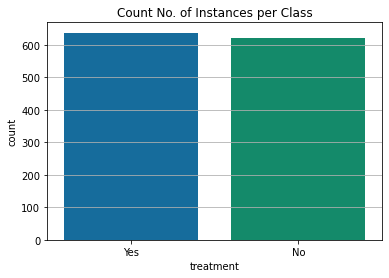

In [8]:
ax = sns.countplot(data['treatment'])
ax.set_title('Count No. of Instances per Class')
plt.savefig('mental_plots/count_class.png')

### Drop Unneccessary Columns

In [9]:
# Timestamps are all unique values
data = data.drop(['Timestamp'], axis= 1)

# Comments are optional free text field.
# There are only 164 comments and may not all related to the dataset
data = data.drop(['comments'], axis= 1)

# There are a lot of missing values in state. 
# This field can be ignore if not take the locations into account.
data = data.drop(['state'], axis= 1)

In [10]:
# Remaining missing values
data.isnull().sum().max()

264

## Data Cleaning

#### Cleaning NaN values

In [11]:
# Cleaning NaN values

default_int = 0
default_string = 'NaN'
default_float = 0.0

data['Age'].fillna(default_int)

for feature in ['Gender', 'Country', 'family_history', 'treatment',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']:
    data[feature] = data[feature].fillna(default_string)

In [12]:
data

Age  Gender         Country self_employed family_history treatment  \
0      37  Female   United States           NaN             No       Yes   
1      44       M   United States           NaN             No        No   
2      32    Male          Canada           NaN             No        No   
3      31    Male  United Kingdom           NaN            Yes       Yes   
4      31    Male   United States           NaN             No        No   
...   ...     ...             ...           ...            ...       ...   
1254   26    male  United Kingdom            No             No       Yes   
1255   32    Male   United States            No            Yes       Yes   
1256   34    male   United States            No            Yes       Yes   
1257   46       f   United States            No             No        No   
1258   25    Male   United States            No            Yes       Yes   

     work_interfere    no_employees remote_work tech_company  ...   anonymity  \
0             Often            6-25          No          Yes  ...         Yes   
1            Rarely  More than 1000          No           No  ...  Don't know   
2            Rarely            6-25          No          Yes  ...  Don't know   
3             Often          26-100          No          Yes  ...          No   
4             Never         100-500         Yes          Yes  ...  Don't know   
...             ...             ...         ...          ...  ...         ...   
1254            NaN          26-100          No          Yes  ...  Don't know   
1255          Often          26-100         Yes          Yes  ...         Yes   
1256      Sometimes  More than 1000          No          Yes  ...  Don't know   
1257            NaN         100-500         Yes          Yes  ...  Don't know   
1258      Sometimes          26-100          No           No  ...         Yes   

                   leave mental_health_consequence phys_health_consequence  \
0          Somewhat easy                        No                      No   
1             Don't know                     Maybe                      No   
2     Somewhat difficult                        No                      No   
3     Somewhat difficult                       Yes                     Yes   
4             Don't know                        No                      No   
...                  ...                       ...                     ...   
1254       Somewhat easy                        No                      No   
1255  Somewhat difficult                        No                      No   
1256  Somewhat difficult                       Yes                     Yes   
1257          Don't know                       Yes                      No   
1258          Don't know                     Maybe                      No   

         coworkers    supervisor mental_health_interview  \
0     Some of them           Yes                      No   
1               No            No                      No   
2              Yes           Yes                     Yes   
3     Some of them            No                   Maybe   
4     Some of them           Yes                     Yes   
...            ...           ...                     ...   
1254  Some of them  Some of them                      No   
1255  Some of them           Yes                      No   
1256            No            No                      No   
1257            No            No                      No   
1258  Some of them            No                      No   

     phys_health_interview mental_vs_physical obs_consequence  
0                    Maybe                Yes              No  
1                       No         Don't know              No  
2                      Yes                 No              No  
3                    Maybe                 No             Yes  
4                      Yes         Don't know              No  
...                    ...                ...             ...  
1254          

#### Unified values

In [13]:
print("Len(): ", len(data['Gender'].str.lower().unique()))
data['Gender'].str.lower().unique()

Len():  43


array(['female', 'm', 'male', 'male-ish', 'maile', 'trans-female',
       'cis female', 'f', 'something kinda male?', 'cis male', 'woman',
       'mal', 'male (cis)', 'queer/she/they', 'non-binary', 'femake',
       'make', 'nah', 'all', 'enby', 'fluid', 'genderqueer', 'female ',
       'androgyne', 'agender', 'cis-female/femme', 'guy (-ish) ^_^',
       'male leaning androgynous', 'male ', 'man', 'trans woman', 'msle',
       'neuter', 'female (trans)', 'queer', 'female (cis)', 'mail',
       'a little about you', 'malr', 'p', 'femail', 'cis man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [14]:
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

In [15]:
for (row, col) in data.iterrows():
    if str.lower(col.Gender) in male_str:
        data['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)
    if str.lower(col.Gender) in female_str:
        data['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)
    if str.lower(col.Gender) in trans_str:
        data['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

# Remove outlier that's not useful
stk_list = ['A little about you', 'p']
data = data[~data['Gender'].isin(stk_list)]

print(data['Gender'].unique())

['female' 'male' 'trans']


In [16]:
# Remove outlier age

data.drop(data[data['Age'] < 0].index, inplace = True) 
data.drop(data[data['Age'] > 100].index, inplace = True) 

In [17]:
# Add column age_range
data['age_range'] = pd.cut(data['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [18]:
print(data['self_employed'].value_counts())
data['self_employed'].fillna('No',inplace=True)

No     1092
Yes     143
Name: self_employed, dtype: int64


In [19]:
print(data['work_interfere'].value_counts())
data['work_interfere'].fillna('Sometimes',inplace=True)

Sometimes    464
Never        213
Rarely       173
Often        140
Name: work_interfere, dtype: int64


In [20]:
data.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
age_range                    0
dtype: int64

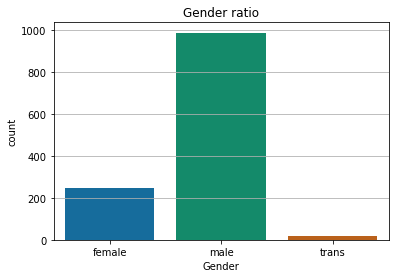

In [21]:
ax = sns.countplot(data['Gender'])
ax.set_title('Gender ratio')
plt.savefig('mental_plots/EDA_Gender_ratio.png')

In [22]:
data['Country'].value_counts()

United States             748
United Kingdom            184
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Sweden                      7
Poland                      7
Italy                       7
Switzerland                 7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Bulgaria                    4
Singapore                   4
Mexico                      3
Austria                     3
Russia                      3
Finland                     3
Greece                      2
Croatia                     2
Denmark                     2
Colombia                    2
Portugal                    2
Georgia                     1
Nigeria                     1
Spain                       1
Uruguay                     1
Czech Repu

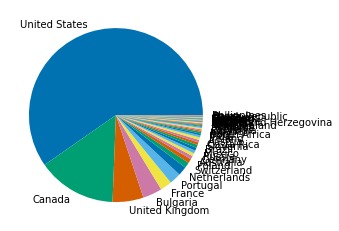

In [23]:
plt.pie(data['Country'].value_counts(),labels=data['Country'].unique(),labeldistance=1.1)
plt.savefig('mental_plots/EDA_Contry_ratio.png')

In [24]:
# Show median age for each country
country = data.groupby(data['Country'])
country['Age'].aggregate(np.median).sort_values()

Country
Slovenia                  19.0
Georgia                   20.0
India                     23.0
Austria                   24.0
Bosnia and Herzegovina    25.0
Nigeria                   25.0
Uruguay                   26.0
Russia                    26.0
Moldova                   26.0
Israel                    26.0
Sweden                    27.0
Hungary                   27.0
Australia                 27.0
Colombia                  27.0
Bulgaria                  27.5
France                    28.0
Brazil                    28.0
Canada                    29.0
Romania                   29.0
Latvia                    29.0
Poland                    29.0
Singapore                 29.5
Spain                     30.0
Belgium                   30.0
Switzerland               30.0
Germany                   30.0
New Zealand               30.0
Philippines               31.0
Mexico                    31.0
United Kingdom            31.0
Ireland                   32.0
United States             32.0


In [25]:
country['treatment','remote_work','self_employed'].describe()

treatment                  remote_work              \
                           count unique  top freq       count unique  top   
Country                                                                     
Australia                     21      2  Yes   13          21      2   No   
Austria                        3      1   No    3           3      2  Yes   
Belgium                        6      2   No    5           6      1   No   
Bosnia and Herzegovina         1      1   No    1           1      1  Yes   
Brazil                         6      2   No    4           6      2   No   
Bulgaria                       4      2  Yes    2           4      2  Yes   
Canada                        72      2  Yes   37          72      2   No   
China                          1      1   No    1           1      1  Yes   
Colombia                       2      1   No    2           2      1   No   
Costa Rica                     1      1   No    1           1      1  Yes   
Croatia                        2      1  Yes    2           2      1  Yes   
Czech Republic                 1      1   No    1           1      1   No   
Denmark                        2      1  Yes    2           2      1   No   
Finland                        3      2   No    2           3      2   No   
France                        13      2   No   11          13      2   No   
Georgia                        1      1   No    1           1      1   No   
Germany                       45      2   No   24          45      2   No   
Greece                         2      1   No    2           2      1  Yes   
Hungary                        1      1   No    1           1      1  Yes   
India                         10      2   No    7          10      2   No   
Ireland                       27      2   No   14          27      2   No   
Israel                         5      1   No    5           5      1   No   
Italy                          7      2   No    6           7      1   No   
Japan                          1      1  Yes    1           1      1  Yes   
Latvia                         1      1   No    1           1      1   No   
Mexico                         3      2   No    2           3      2  Yes   
Moldova                        1      1  Yes    1           1      1   No   
Netherlands                   27      2   No   18          27      2   No   
New Zealand                    8      2  Yes    5           8      2   No   
Nigeria                        1      1   No    1           1      1   No   
Norway                         1      1   No    1           1      1   No   
Philippines                    1      1   No    1           1      1   No   
Poland                         7      2  Yes    4           7      2  Yes   
Portugal                       2      1   No    2           2      1   No   
Romania                        1      1   No    1           1      1  Yes   
Russia                         3      1   No    3           3      2   No   
Singapore                      4      2   No    3           4      2  Yes   
Slovenia                       1      1  Yes    1           1      1   No   
South Africa                   6      2  Yes    4           6      2  Yes   
Spain                          1      1   No    1           1      1   No   
Sweden                         7      2   No    5           7      1   No   
Switzerland                    7      2   No    4           7      1   No   
Thailand                       1      1   No    1           1      1   No   
United Kingdom               184      2   No   92         184      2   No   
United States                748      2  Yes  408         748      2   No   
Uruguay                        1      1   No    1           1      1  Yes   

                            self_employed                   
                       freq         count unique  top freq  
Country                                                     
Australia                13            21      2   No   19  
Austr

treatment                No  Yes
Country                         
Australia                 8   13
Austria                   3    0
Belgium                   5    1
Bosnia and Herzegovina    1    0
Brazil                    4    2
Bulgaria                  2    2
Canada                   35   37
China                     1    0
Colombia                  2    0
Costa Rica                1    0
Croatia                   0    2
Czech Republic            1    0
Denmark                   0    2
Finland                   2    1
France                   11    2
Georgia                   1    0
Germany                  24   21
Greece                    2    0
Hungary                   1    0
India                     7    3
Ireland                  14   13
Israel                    5    0
Italy                     6    1
Japan                     0    1
Latvia                    1    0
Mexico                    2    1
Moldova                   0    1
Netherlands              18    9
New Zealan

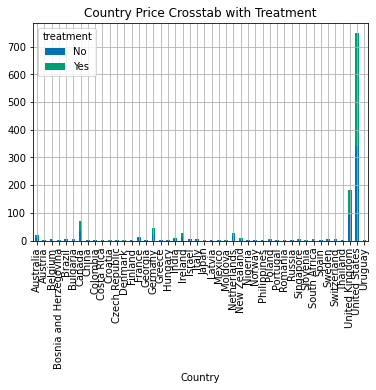

In [26]:
ct = pd.crosstab(data['Country'], data['treatment'])
print(ct)
ax = ct.plot.bar(stacked=True)
ax.set_title('Country Price Crosstab with Treatment')
plt.savefig('mental_plots/crosstab_country.png')

In [27]:
s_employ=data.groupby(['self_employed'])
s_employ['treatment'].describe()

count unique  top freq
self_employed                       
No             1110      2  Yes  557
Yes             143      2  Yes   75

treatment       No  Yes
self_employed          
No             553  557
Yes             68   75


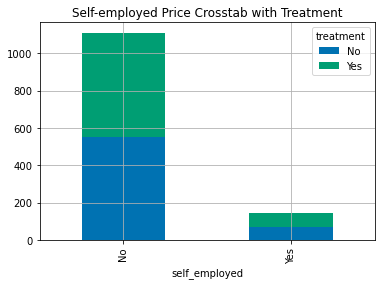

In [28]:
ct = pd.crosstab(data['self_employed'], data['treatment'])
print(ct)
ax = ct.plot.bar(stacked=True)
ax.set_title('Self-employed Price Crosstab with Treatment')
plt.savefig('mental_plots/crosstab_self-employed.png')

In [29]:
treat=data.groupby(['treatment'])
treat['Age'].describe()

count       mean       std   min   25%   50%   75%   max
treatment                                                          
No         621.0  31.458937  7.084081   5.0  27.0  31.0  35.0  65.0
Yes        632.0  32.607595  7.558193  18.0  27.0  32.0  37.0  72.0

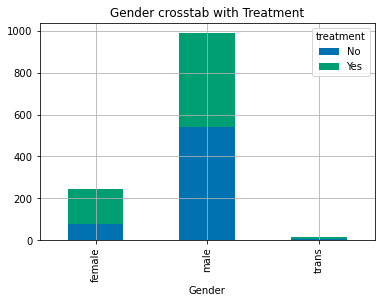

In [30]:
ct = pd.crosstab(data['Gender'], data['treatment'])
ax = ct.plot.bar(stacked=True)
ax.set_title('Gender crosstab with Treatment')
plt.savefig('mental_plots/crosstab_Gender.png')

treatment            No  Yes
leave                       
Don't know          308  253
Somewhat difficult   44   81
Somewhat easy       135  131
Very difficult       31   66
Very easy           103  101


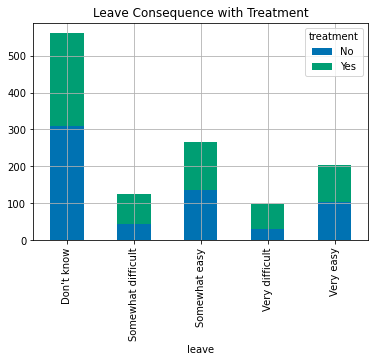

In [31]:
ct = pd.crosstab(data['leave'], data['treatment'])
print(ct)
ax = ct.plot.bar(stacked=True)
ax.set_title('Leave Consequence with Treatment')
plt.savefig('mental_plots/crosstab_leave.png')

treatment                   No  Yes
mental_health_consequence          
Maybe                      224  252
No                         279  210
Yes                        118  170


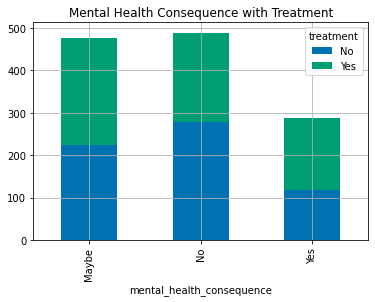

In [32]:
ct = pd.crosstab(data['mental_health_consequence'], data['treatment'])
print(ct)
ax = ct.plot.bar(stacked=True)
ax.set_title('Mental Health Consequence with Treatment')
plt.savefig('mental_plots/crosstab_mental_health_consequence.png')

treatment                 No  Yes
phys_health_consequence          
Maybe                    127  146
No                       469  453
Yes                       25   33


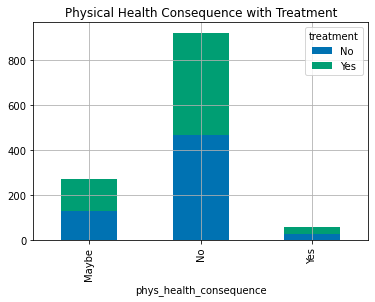

In [33]:
ct = pd.crosstab(data['phys_health_consequence'], data['treatment'])
print(ct)
ax = ct.plot.bar(stacked=True)
ax.set_title('Physical Health Consequence with Treatment')
plt.savefig('mental_plots/crosstab_phys_health_consequence.png')

# Label Encoding
using LabelEncoder from sklearn library

In [34]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

In [35]:
labelDict = {}
for feature in data:
    le = preprocessing.LabelEncoder()
    le.fit(data[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    data[feature] = le.transform(data[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

# Drop 'Country' column
data = data.drop(['Country'], axis= 1)
data.head()

label_Age [5, 11, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ['Never', 'Often', 'Rarely', 'Sometimes']
label_no_employees ['1-5', '100

Age  Gender  self_employed  family_history  treatment  work_interfere  \
0   21       0              0               0          1               1   
1   28       1              0               0          0               2   
2   16       1              0               0          0               2   
3   15       1              0               1          1               1   
4   15       1              0               0          0               0   

   no_employees  remote_work  tech_company  benefits  ...  leave  \
0             4            0             1         2  ...      2   
1             5            0             0         0  ...      0   
2             4            0             1         1  ...      1   
3             2            0             1         1  ...      1   
4             1            1             1         2  ...      0   

   mental_health_consequence  phys_health_consequence  coworkers  supervisor  \
0                          1                        1          1           2   
1                          0                        1          0           0   
2                          1                        1          2           2   
3                          2                        2          1           0   
4                          1                        1          1           2   

   mental_health_interview  phys_health_interview  mental_vs_physical  \
0                        1                      0                   2   
1                        1                      1                   0   
2                        2                      2                   1   
3                        0                      0                   1   
4                        2                      2                   0   

   obs_consequence  age_range  
0                0          2  
1                0          2  
2                0          2  
3                1          2  
4                0          2  

[5 rows x 24 columns]

In [36]:
print("check missing values")
total = data.isnull().sum().sort_values(ascending=False)
total

check missing values


age_range                    0
obs_consequence              0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
Age                          0
dtype: int64

## Correlation matrix


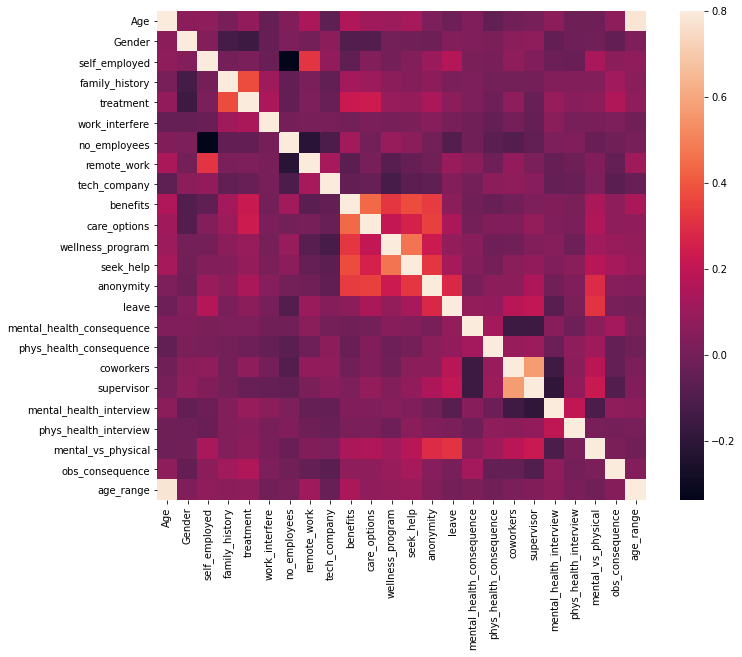

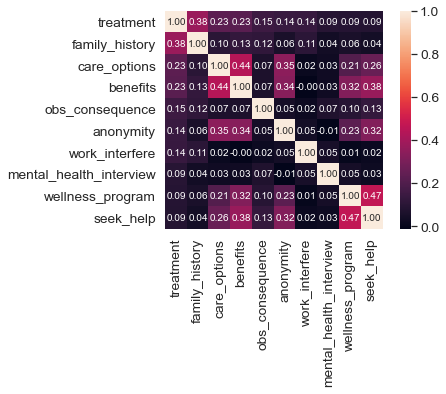

In [37]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.savefig('mental_plots/EDA_correlation_matrix.png')
plt.show()


# treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.savefig('mental_plots/EDA_correlation_matrix_n_largest.png')
plt.show()

Text(0.5, 46.5, 'Age')

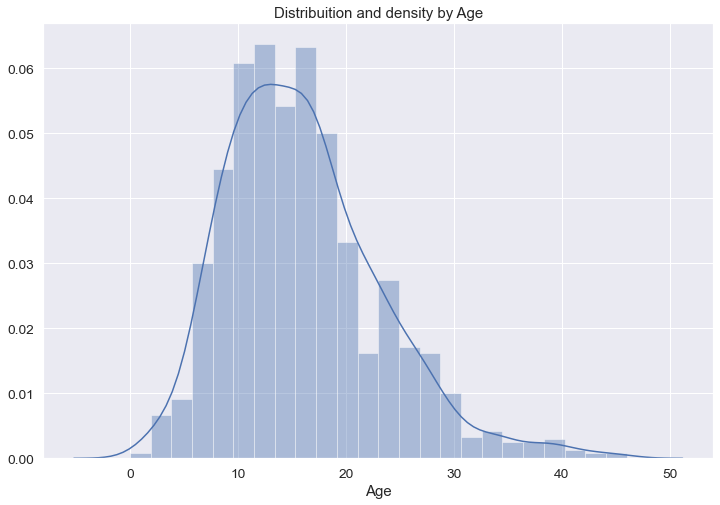

In [38]:
# Distribiution and density by Age
plt.figure(figsize=(12,8))
sns.distplot(data["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.savefig('mental_plots/EDA_age_distribution.png')
plt.xlabel("Age")

<Figure size 864x576 with 0 Axes>

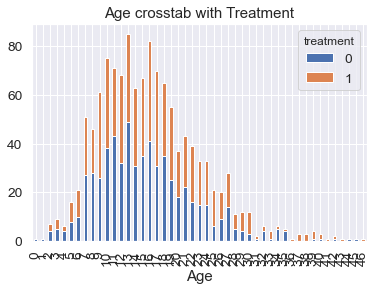

In [39]:
ct = pd.crosstab(data['Age'], data['treatment'])
plt.figure(figsize=(12,8))
ax = ct.plot.bar(stacked=True)
ax.set_title('Age crosstab with Treatment')
plt.savefig('mental_plots/crosstab_Age.png')

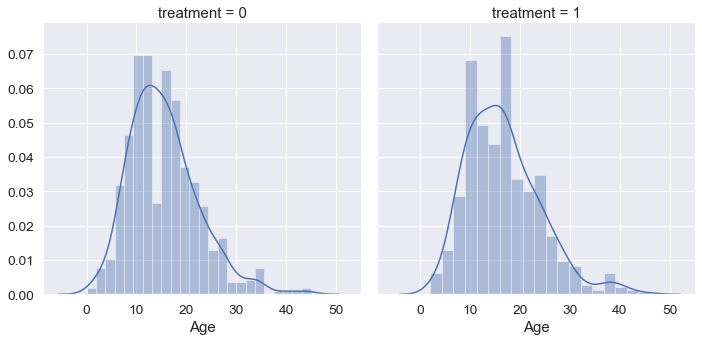

In [40]:
g = sns.FacetGrid(data, col='treatment', size=5)
g = g.map(sns.distplot, "Age")
plt.savefig('mental_plots/EDA_dist_Age_w_treatment.png')

In [41]:
# Scaling Age
scaler = MinMaxScaler()
data['Age'] = scaler.fit_transform(data[['Age']])
data.head()

Age  Gender  self_employed  family_history  treatment  work_interfere  \
0  0.456522       0              0               0          1               1   
1  0.608696       1              0               0          0               2   
2  0.347826       1              0               0          0               2   
3  0.326087       1              0               1          1               1   
4  0.326087       1              0               0          0               0   

   no_employees  remote_work  tech_company  benefits  ...  leave  \
0             4            0             1         2  ...      2   
1             5            0             0         0  ...      0   
2             4            0             1         1  ...      1   
3             2            0             1         1  ...      1   
4             1            1             1         2  ...      0   

   mental_health_consequence  phys_health_consequence  coworkers  supervisor  \
0                          1                        1          1           2   
1                          0                        1          0           0   
2                          1                        1          2           2   
3                          2                        2          1           0   
4                          1                        1          1           2   

   mental_health_interview  phys_health_interview  mental_vs_physical  \
0                        1                      0                   2   
1                        1                      1                   0   
2                        2                      2                   1   
3                        0                      0                   1   
4                        2                      2                   0   

   obs_consequence  age_range  
0                0          2  
1                0          2  
2                0          2  
3                1          2  
4                0          2  

[5 rows x 24 columns]

In [42]:
data.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'age_range'],
      dtype='object')

# Train-Test Splitting & Cross Validation

In [43]:
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve, cross_val_score
from external_fn import plot_learning_curve, plot_validation_curve, plot_roc_auc_curve

x = data[['Age', 'Gender', 'self_employed', 'family_history',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'age_range' ]]
y = data['treatment']

# Plot customization
plt.rcParams['axes.grid'] = True
plt.style.use('seaborn-colorblind')

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

### Initialize Score Reporting

In [45]:
from sklearn.metrics import accuracy_score,roc_auc_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [46]:
result = {
    'Decision_Tree': {}, 
    'Neural_Network': {},
    'Boosting': {},
    'SVM': {},
    'k-NN': {}
}

# 1 Decision Trees

with some form of pruning and describe split attributes

max_depth =  1
Accuracy:  0.6812749003984063
ROC AUC score:  0.6994093977154724
F1 Score:  0.6747967479674797
Training Accuracy:  0.6836327345309381
Testing Accuracy:  0.6812749003984063
Confusion Matrix
[[88 19]
 [61 83]]
Classification Report
              precision    recall  f1-score   support

           0       0.59      0.82      0.69       107
           1       0.81      0.58      0.67       144

    accuracy                           0.68       251
   macro avg       0.70      0.70      0.68       251
weighted avg       0.72      0.68      0.68       251

Cross Validation Score
[0.64490927 0.65297379 0.77777778 0.67293907 0.72862263 0.69726062
 0.67306708 0.67204301 0.65668203 0.66500256]


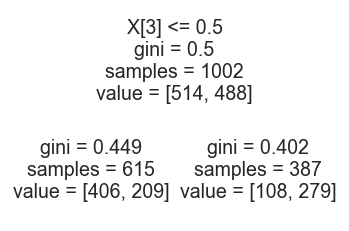

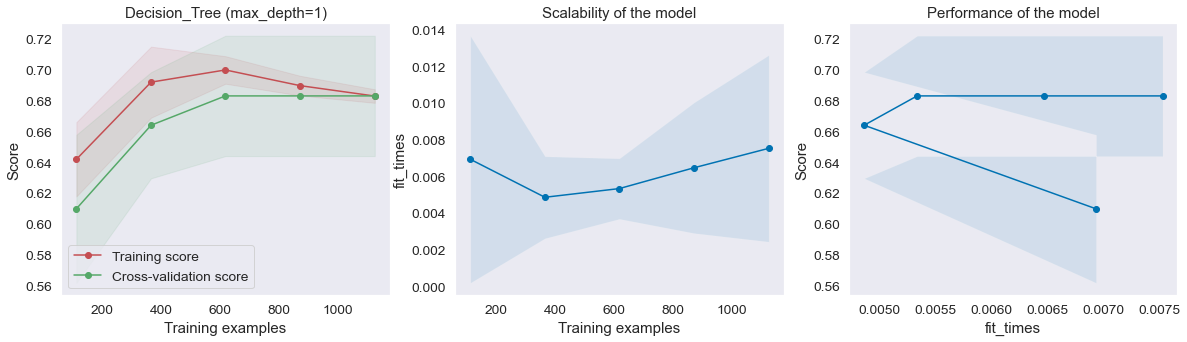

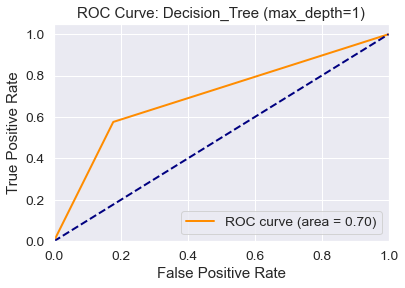

--------------------------------------------------
max_depth =  2
Accuracy:  0.7051792828685259
ROC AUC score:  0.7010319314641744
F1 Score:  0.73943661971831
Training Accuracy:  0.718562874251497
Testing Accuracy:  0.7051792828685259
Confusion Matrix
[[ 72  35]
 [ 39 105]]
Classification Report
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       107
           1       0.75      0.73      0.74       144

    accuracy                           0.71       251
   macro avg       0.70      0.70      0.70       251
weighted avg       0.71      0.71      0.71       251

Cross Validation Score
[0.73462702 0.71761593 0.77588813 0.76292883 0.77598566 0.73374296
 0.69905274 0.75384025 0.72004608 0.69482847]


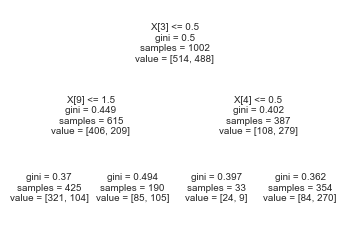

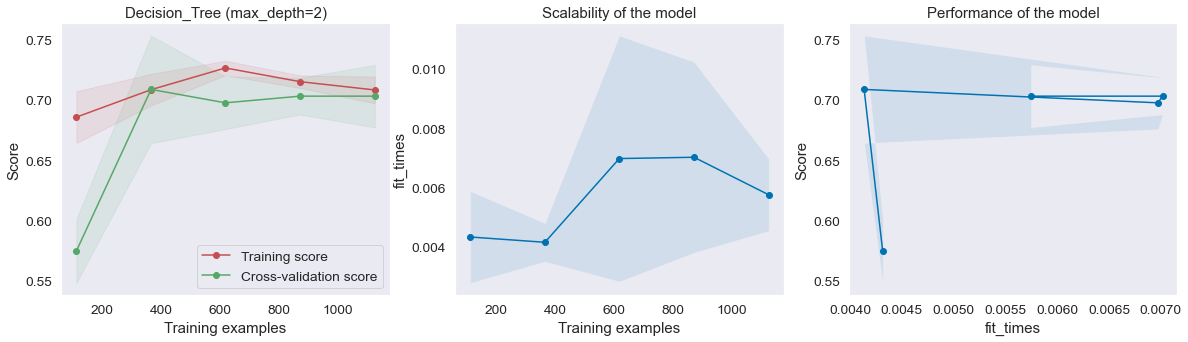

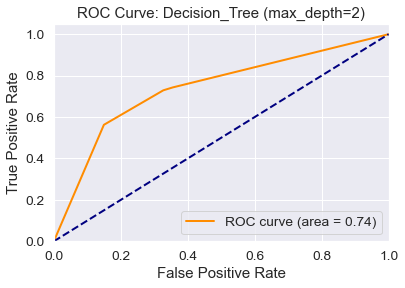

--------------------------------------------------
max_depth =  3
Accuracy:  0.7330677290836654
ROC AUC score:  0.7349428868120458
F1 Score:  0.7563636363636363
Training Accuracy:  0.7445109780439122
Testing Accuracy:  0.7330677290836654
Confusion Matrix
[[ 80  27]
 [ 40 104]]
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.75      0.70       107
           1       0.79      0.72      0.76       144

    accuracy                           0.73       251
   macro avg       0.73      0.73      0.73       251
weighted avg       0.74      0.73      0.73       251

Cross Validation Score
[0.77305948 0.75365423 0.79491056 0.8343574  0.82232463 0.76228879
 0.72951869 0.79902714 0.78712238 0.76510497]


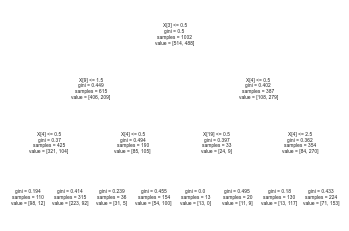

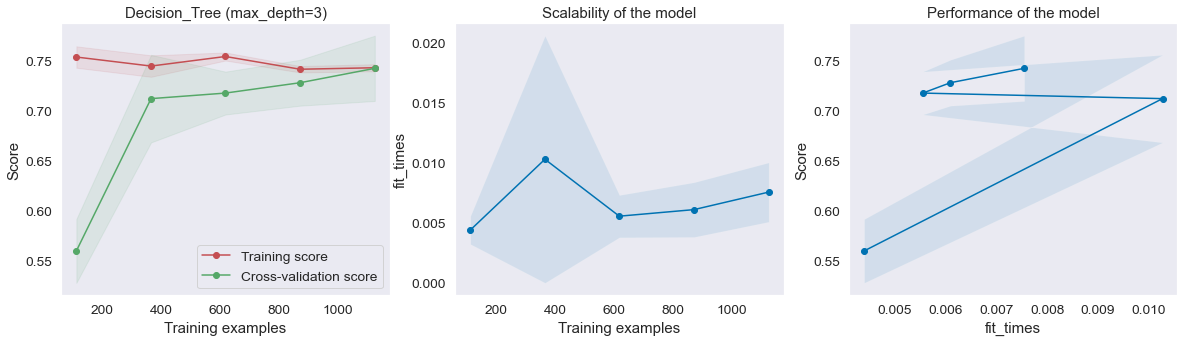

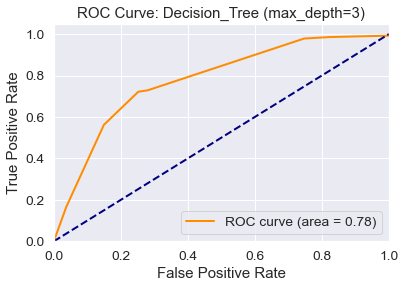

--------------------------------------------------
max_depth =  4
Accuracy:  0.7569721115537849
ROC AUC score:  0.7509735202492213
F1 Score:  0.7889273356401383
Training Accuracy:  0.7564870259481038
Testing Accuracy:  0.7569721115537849
Confusion Matrix
[[ 76  31]
 [ 30 114]]
Classification Report
              precision    recall  f1-score   support

           0       0.72      0.71      0.71       107
           1       0.79      0.79      0.79       144

    accuracy                           0.76       251
   macro avg       0.75      0.75      0.75       251
weighted avg       0.76      0.76      0.76       251

Cross Validation Score
[0.79788306 0.76134073 0.80687831 0.82514081 0.83627752 0.7515361
 0.73963134 0.78417819 0.78558628 0.80286738]


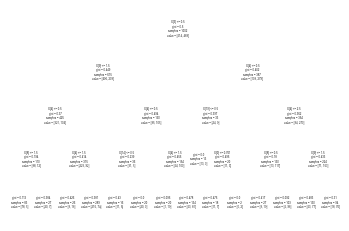

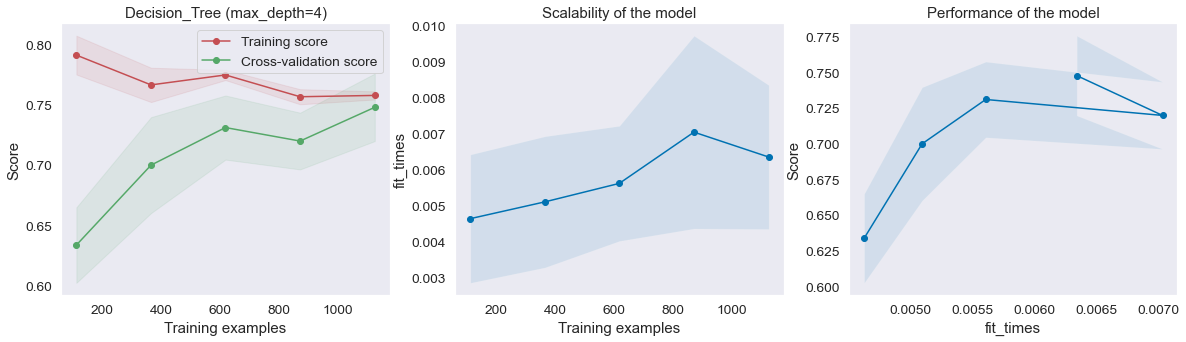

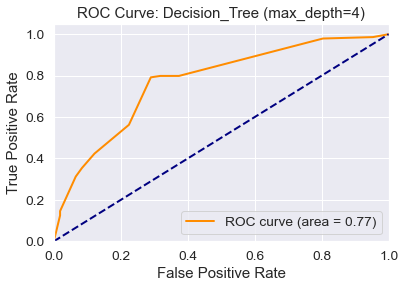

--------------------------------------------------
max_depth =  5
Accuracy:  0.7529880478087649
ROC AUC score:  0.7547053478712358
F1 Score:  0.7753623188405797
Training Accuracy:  0.7604790419161677
Testing Accuracy:  0.7529880478087649
Confusion Matrix
[[ 82  25]
 [ 37 107]]
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.77      0.73       107
           1       0.81      0.74      0.78       144

    accuracy                           0.75       251
   macro avg       0.75      0.75      0.75       251
weighted avg       0.76      0.75      0.75       251

Cross Validation Score
[0.79826109 0.77066532 0.77777778 0.82770097 0.83256528 0.76702509
 0.74987199 0.77176139 0.8046595  0.80184332]


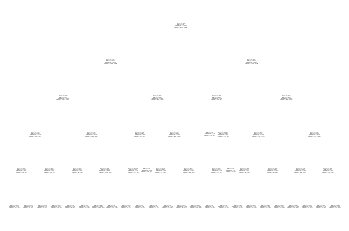

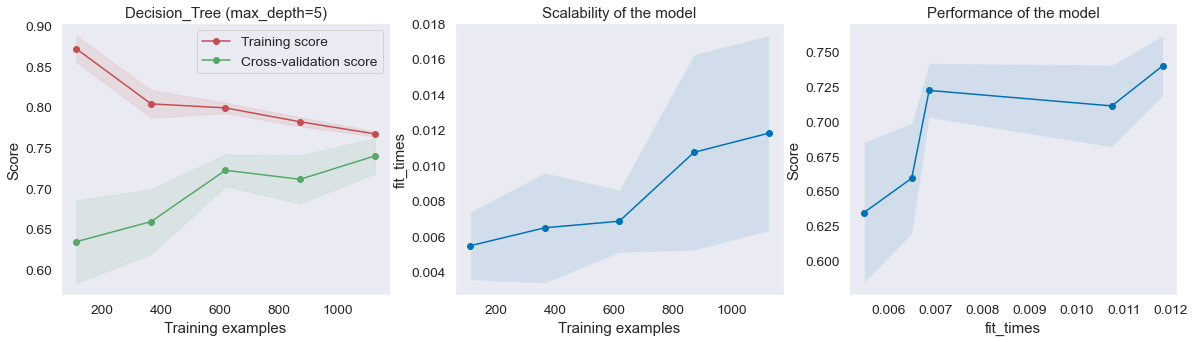

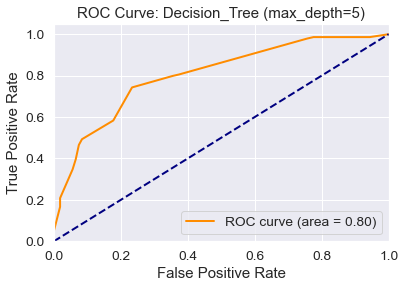

--------------------------------------------------
max_depth =  6
Accuracy:  0.7211155378486056
ROC AUC score:  0.7257268951194185
F1 Score:  0.7407407407407406
Training Accuracy:  0.7964071856287425
Testing Accuracy:  0.7211155378486056
Confusion Matrix
[[ 81  26]
 [ 44 100]]
Classification Report
              precision    recall  f1-score   support

           0       0.65      0.76      0.70       107
           1       0.79      0.69      0.74       144

    accuracy                           0.72       251
   macro avg       0.72      0.73      0.72       251
weighted avg       0.73      0.72      0.72       251

Cross Validation Score
[0.80405746 0.74470766 0.77689594 0.78853047 0.7875064  0.78072197
 0.75268817 0.75       0.75652842 0.79659498]


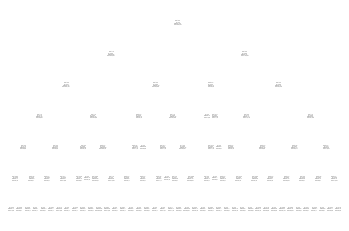

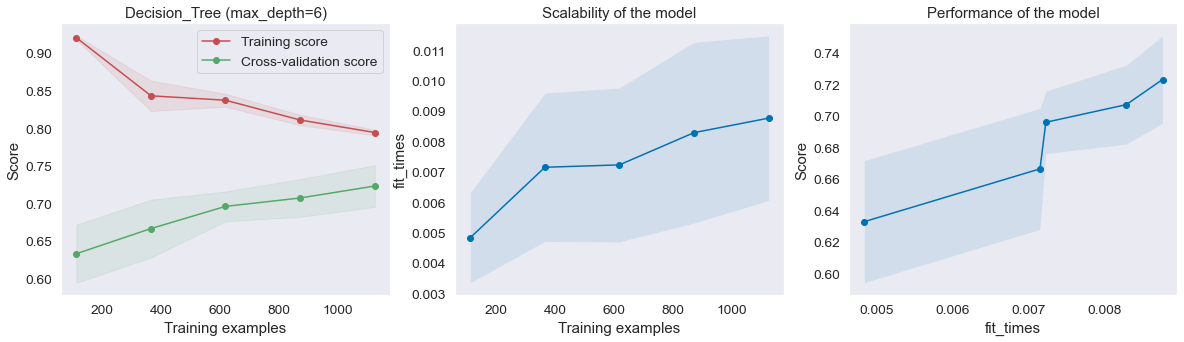

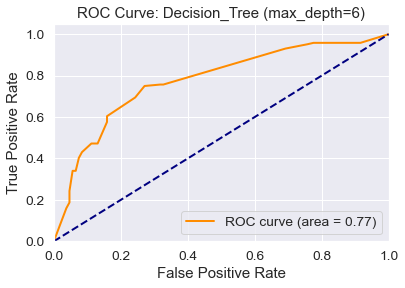

--------------------------------------------------
max_depth =  9
Accuracy:  0.6693227091633466
ROC AUC score:  0.6877920560747663
F1 Score:  0.6612244897959184
Training Accuracy:  0.8872255489021956
Testing Accuracy:  0.6693227091633466
Confusion Matrix
[[87 20]
 [63 81]]
Classification Report
              precision    recall  f1-score   support

           0       0.58      0.81      0.68       107
           1       0.80      0.56      0.66       144

    accuracy                           0.67       251
   macro avg       0.69      0.69      0.67       251
weighted avg       0.71      0.67      0.67       251

Cross Validation Score
[0.71370968 0.64982359 0.70786092 0.7062212  0.71134153 0.734383
 0.6749872  0.73502304 0.69559652 0.73105479]


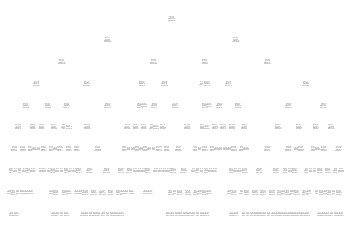

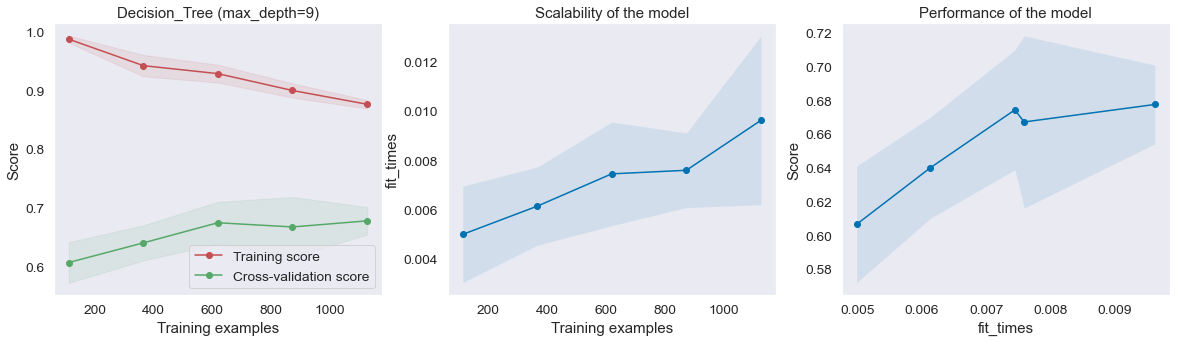

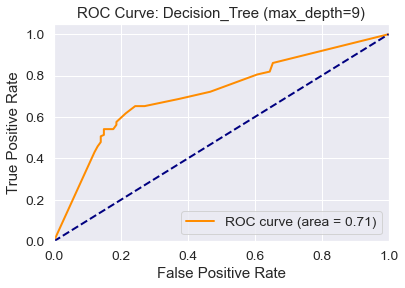

--------------------------------------------------
max_depth =  12
Accuracy:  0.6892430278884463
ROC AUC score:  0.6991497923156802
F1 Score:  0.7
Training Accuracy:  0.9680638722554891
Testing Accuracy:  0.6892430278884463
Confusion Matrix
[[82 25]
 [53 91]]
Classification Report
              precision    recall  f1-score   support

           0       0.61      0.77      0.68       107
           1       0.78      0.63      0.70       144

    accuracy                           0.69       251
   macro avg       0.70      0.70      0.69       251
weighted avg       0.71      0.69      0.69       251

Cross Validation Score
[0.6735131  0.5719506  0.73897707 0.67165899 0.70814132 0.68868408
 0.6374808  0.68113159 0.66359447 0.6765233 ]


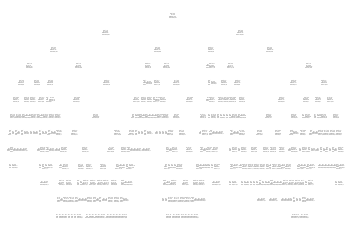

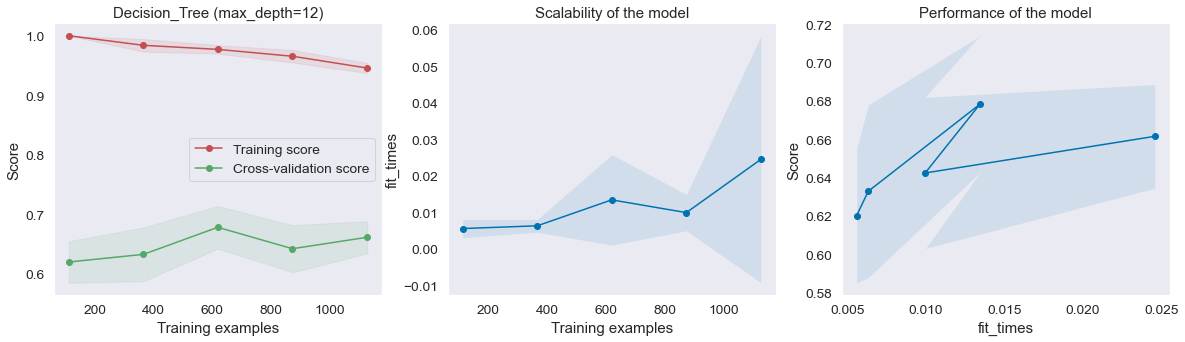

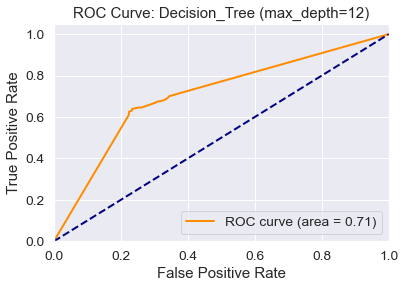

--------------------------------------------------
max_depth =  15
Accuracy:  0.6772908366533864
ROC AUC score:  0.685131100726895
F1 Score:  0.6920152091254752
Training Accuracy:  0.9920159680638723
Testing Accuracy:  0.6772908366533864
Confusion Matrix
[[79 28]
 [53 91]]
Classification Report
              precision    recall  f1-score   support

           0       0.60      0.74      0.66       107
           1       0.76      0.63      0.69       144

    accuracy                           0.68       251
   macro avg       0.68      0.69      0.68       251
weighted avg       0.69      0.68      0.68       251

Cross Validation Score
[0.66759073 0.61063508 0.66880826 0.67729135 0.69700461 0.68292371
 0.66103431 0.61610343 0.67473118 0.69508449]


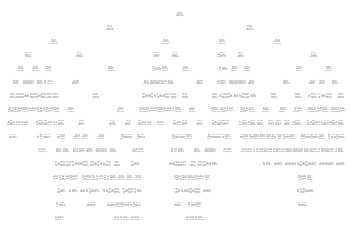

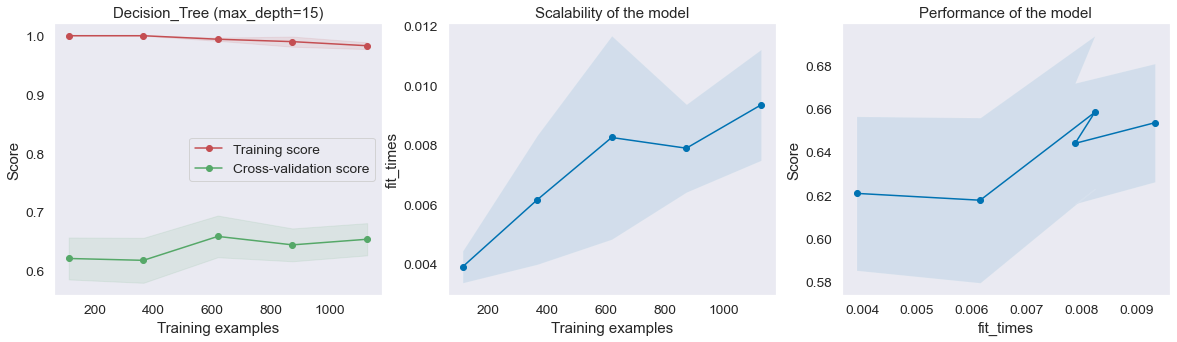

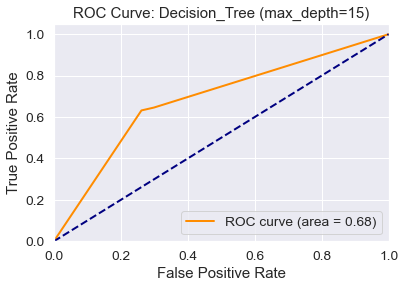

--------------------------------------------------
max_depth =  18
Accuracy:  0.6693227091633466
ROC AUC score:  0.6805880062305296
F1 Score:  0.6770428015564202
Training Accuracy:  1.0
Testing Accuracy:  0.6693227091633466
Confusion Matrix
[[81 26]
 [57 87]]
Classification Report
              precision    recall  f1-score   support

           0       0.59      0.76      0.66       107
           1       0.77      0.60      0.68       144

    accuracy                           0.67       251
   macro avg       0.68      0.68      0.67       251
weighted avg       0.69      0.67      0.67       251

Cross Validation Score
[0.64629536 0.62638609 0.69047619 0.66333845 0.68612391 0.67229903
 0.61584741 0.60483871 0.69406042 0.64964158]


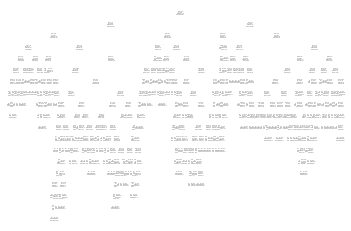

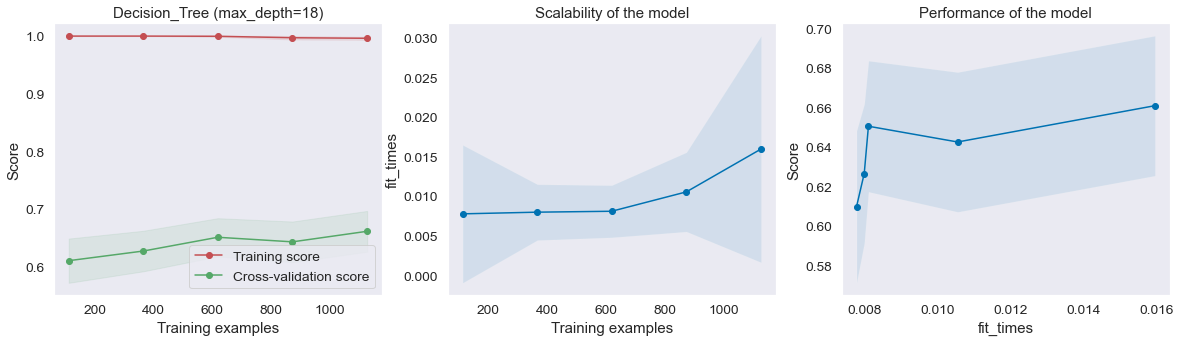

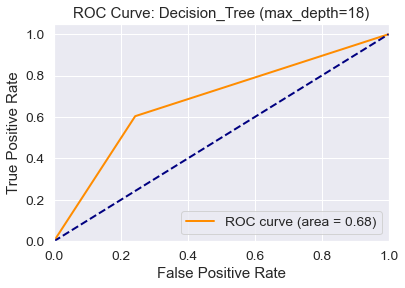

--------------------------------------------------
max_depth =  21
Accuracy:  0.6653386454183267
ROC AUC score:  0.6711124091381101
F1 Score:  0.6842105263157895
Training Accuracy:  1.0
Testing Accuracy:  0.6653386454183267
Confusion Matrix
[[76 31]
 [53 91]]
Classification Report
              precision    recall  f1-score   support

           0       0.59      0.71      0.64       107
           1       0.75      0.63      0.68       144

    accuracy                           0.67       251
   macro avg       0.67      0.67      0.66       251
weighted avg       0.68      0.67      0.67       251

Cross Validation Score
[0.63583669 0.58089718 0.67460317 0.64746544 0.70967742 0.65604199
 0.64772145 0.63965694 0.61610343 0.69623656]


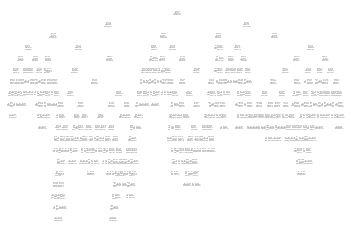

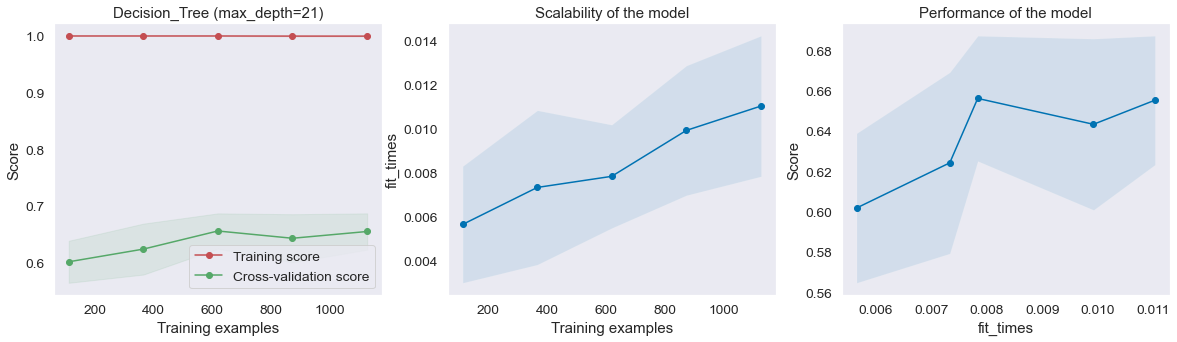

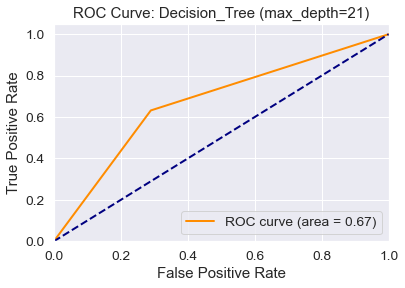

--------------------------------------------------
max_depth =  24
Accuracy:  0.6812749003984063
ROC AUC score:  0.6910046728971962
F1 Score:  0.6923076923076923
Training Accuracy:  1.0
Testing Accuracy:  0.6812749003984063
Confusion Matrix
[[81 26]
 [54 90]]
Classification Report
              precision    recall  f1-score   support

           0       0.60      0.76      0.67       107
           1       0.78      0.62      0.69       144

    accuracy                           0.68       251
   macro avg       0.69      0.69      0.68       251
weighted avg       0.70      0.68      0.68       251

Cross Validation Score
[0.65196573 0.59677419 0.6984127  0.65527394 0.68778802 0.63991295
 0.63965694 0.62327189 0.62416795 0.68023554]


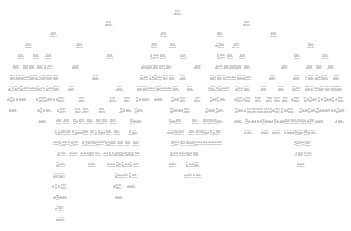

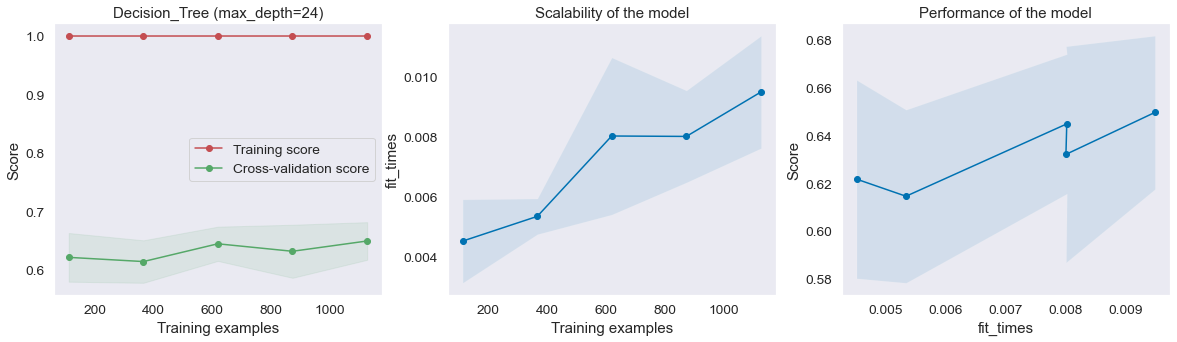

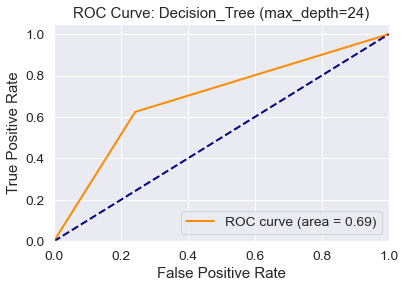

--------------------------------------------------
max_depth =  27
Accuracy:  0.6772908366533864
ROC AUC score:  0.6839304257528558
F1 Score:  0.6943396226415093
Training Accuracy:  1.0
Testing Accuracy:  0.6772908366533864
Confusion Matrix
[[78 29]
 [52 92]]
Classification Report
              precision    recall  f1-score   support

           0       0.60      0.73      0.66       107
           1       0.76      0.64      0.69       144

    accuracy                           0.68       251
   macro avg       0.68      0.68      0.68       251
weighted avg       0.69      0.68      0.68       251

Cross Validation Score
[0.64364919 0.58014113 0.66666667 0.67153098 0.65565796 0.64004096
 0.63146441 0.60727087 0.6641065  0.67217102]


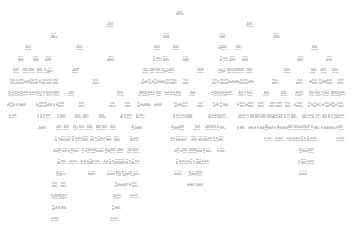

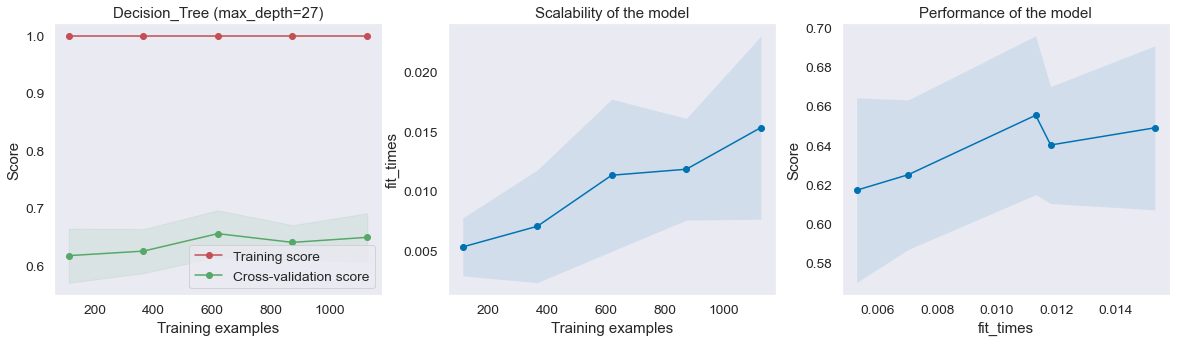

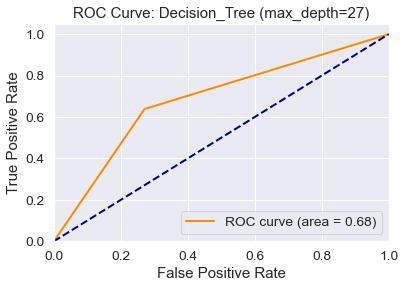

--------------------------------------------------


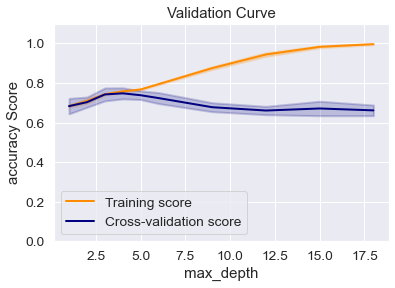

CPU times: user 2min 34s, sys: 12.9 s, total: 2min 47s
Wall time: 3min 11s


In [55]:
%%time
task = "Decision_Tree"
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

f1 = []
train_acc = []
test_acc = []
params = [1, 2, 3, 4, 5, 6, 9, 12, 15, 18, 21, 24, 27]
for k in params:
    print("max_depth = ", k)
    clf = DecisionTreeClassifier(max_depth = k)
    fit_tree = clf.fit(x_train, y_train)
    
    # See the tree
    tree.plot_tree(fit_tree) 
    plt.savefig(f'mental_plots/learning_curve_{task}_tree_{k}.png')
    
    y_pred = clf.predict(x_test)
    result[task][k] = {
        "accuracy_score" : accuracy_score(y_test,y_pred),
        "roc_auc": roc_auc_score(y_test, y_pred),
        "f1" : f1_score(y_test,y_pred, average='binary'),
        "training_acc": clf.score(x_train, y_train),
        "testing_acc": clf.score(x_test, y_test),
        "confusion_mat": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test,y_pred),
        "cross_validation_score": cross_val_score(clf, x, y, cv=10, scoring='roc_auc'),
        "tree_rules": tree.export_text(clf, feature_names=list(x_train))
    }
    print("Accuracy: ", result[task][k]["accuracy_score"])
    print("ROC AUC score: ", result[task][k]["roc_auc"])
    print("F1 Score: ", result[task][k]["f1"])
    print("Training Accuracy: ", result[task][k]["training_acc"])
    print("Testing Accuracy: ", result[task][k]["testing_acc"])
    print("Confusion Matrix")
    print(result[task][k]["confusion_mat"])
    print("Classification Report")
    print(result[task][k]["classification_report"])
    print("Cross Validation Score")
    print(result[task][k]["cross_validation_score"])
    
    # Add to lists
    f1.append(result[task][k]["f1"])
    train_acc.append(result[task][k]["training_acc"])
    test_acc.append(result[task][k]["testing_acc"])
    
    # Learning Curve
    plot_learning_curve(clf, f"{task} (max_depth={k})", x, y, axes=None, cv=10, n_jobs=4)
    plt.savefig(f'mental_plots/learning_curve_{task}_{k}.png')
    plt.show()
    
    # ROC_AUC Plot
    plot_roc_auc_curve(clf, x_test,y_test, y_pred, f"ROC Curve: {task} (max_depth={k})")
    plt.savefig(f'mental_plots/roc_curve_{task}_{k}.png')
    plt.show()
    
    print("--------------------------------------------------")
    
# Validation Curve
new_params = params[:10]
plot_validation_curve(DecisionTreeClassifier(), f"{task}: max_depth", x, y, "max_depth", new_params, scoring="accuracy", axes=None, cv=10, n_jobs=4)
plt.savefig(f'mental_plots/validation_curve_{task}.png')
plt.show()

# 2 Neural Networks

hidden_layer_sizes =  5 , activation =  relu
Accuracy:  0.6135458167330677
ROC AUC score:  0.6199701453790238
F1 Score:  0.6311787072243346
Training Accuracy:  0.6576846307385229
Testing Accuracy:  0.6135458167330677
Confusion Matrix
[[71 36]
 [61 83]]
Classification Report
              precision    recall  f1-score   support

           0       0.54      0.66      0.59       107
           1       0.70      0.58      0.63       144

    accuracy                           0.61       251
   macro avg       0.62      0.62      0.61       251
weighted avg       0.63      0.61      0.62       251

Cross Validation Score
[0.74596774 0.76386089 0.75988914 0.83371736 0.76036866 0.75192012
 0.72708653 0.71518177 0.68330773 0.76062468]


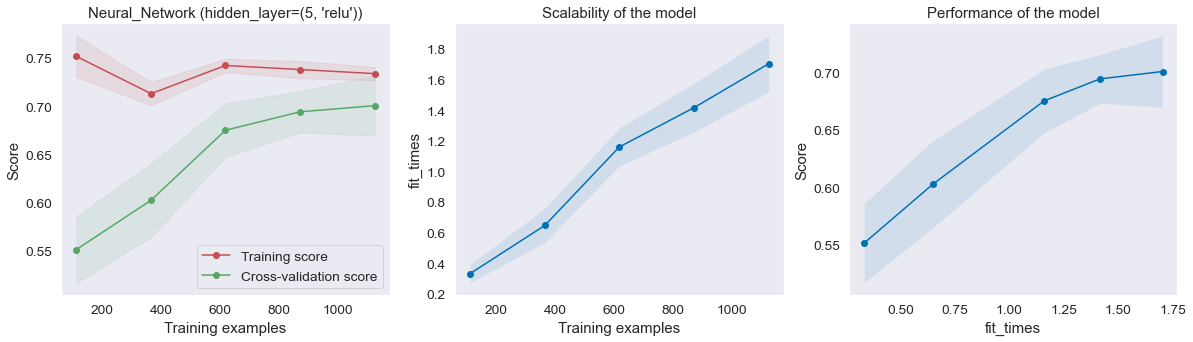

<Figure size 432x288 with 0 Axes>

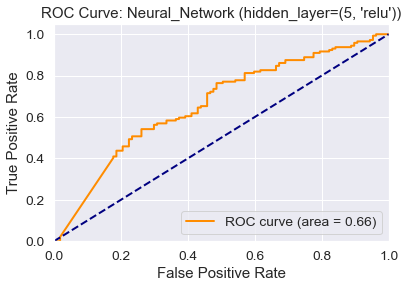

--------------------------------------------------
hidden_layer_sizes =  10 , activation =  relu
Accuracy:  0.6892430278884463
ROC AUC score:  0.688343717549325
F1 Score:  0.7194244604316546
Training Accuracy:  0.719560878243513
Testing Accuracy:  0.6892430278884463
Confusion Matrix
[[ 73  34]
 [ 44 100]]
Classification Report
              precision    recall  f1-score   support

           0       0.62      0.68      0.65       107
           1       0.75      0.69      0.72       144

    accuracy                           0.69       251
   macro avg       0.69      0.69      0.69       251
weighted avg       0.69      0.69      0.69       251

Cross Validation Score
[0.73109879 0.76738911 0.79692618 0.82309268 0.8172043  0.70762929
 0.74833589 0.76984127 0.69431644 0.73809524]


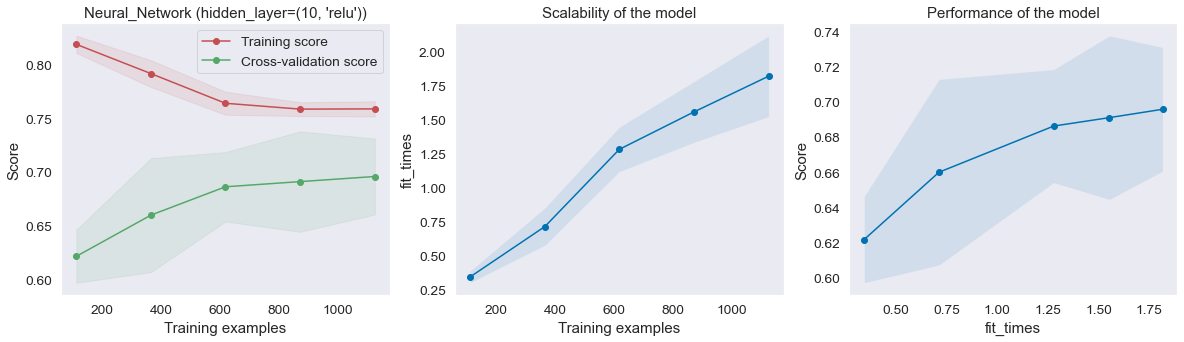

<Figure size 432x288 with 0 Axes>

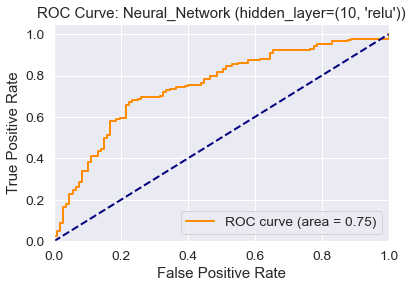

--------------------------------------------------
hidden_layer_sizes =  15 , activation =  relu
Accuracy:  0.701195219123506
ROC AUC score:  0.7035630841121495
F1 Score:  0.7252747252747254
Training Accuracy:  0.7225548902195609
Testing Accuracy:  0.701195219123506
Confusion Matrix
[[77 30]
 [45 99]]
Classification Report
              precision    recall  f1-score   support

           0       0.63      0.72      0.67       107
           1       0.77      0.69      0.73       144

    accuracy                           0.70       251
   macro avg       0.70      0.70      0.70       251
weighted avg       0.71      0.70      0.70       251

Cross Validation Score
[0.77570565 0.76461694 0.81027967 0.81336406 0.78673835 0.71146953
 0.72785458 0.82488479 0.7235023  0.80056324]


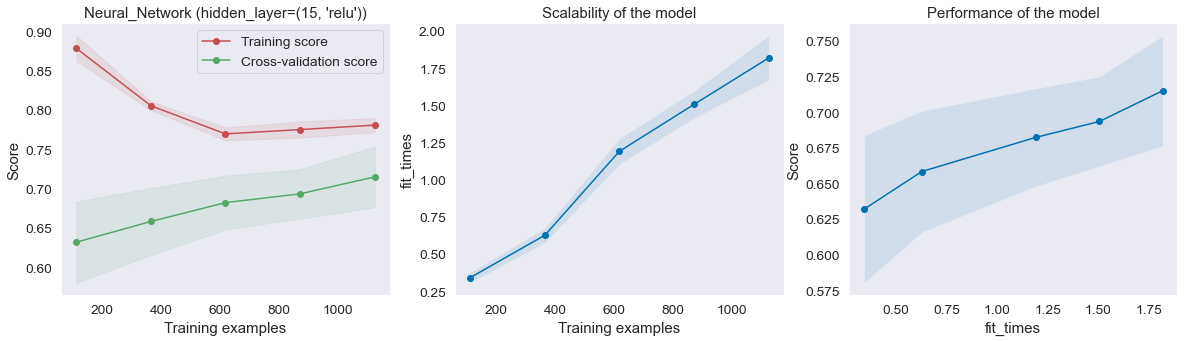

<Figure size 432x288 with 0 Axes>

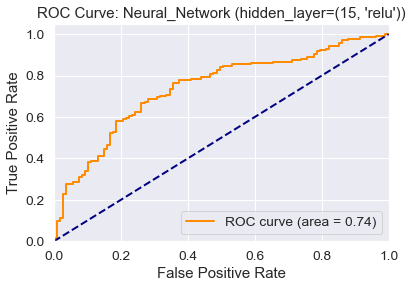

--------------------------------------------------
hidden_layer_sizes =  20 , activation =  relu
Accuracy:  0.6892430278884463
ROC AUC score:  0.7003504672897196
F1 Score:  0.6976744186046512
Training Accuracy:  0.7295409181636726
Testing Accuracy:  0.6892430278884463
Confusion Matrix
[[83 24]
 [54 90]]
Classification Report
              precision    recall  f1-score   support

           0       0.61      0.78      0.68       107
           1       0.79      0.62      0.70       144

    accuracy                           0.69       251
   macro avg       0.70      0.70      0.69       251
weighted avg       0.71      0.69      0.69       251

Cross Validation Score
[0.77620968 0.78805444 0.76417234 0.83538146 0.83410138 0.73297491
 0.76318484 0.83358935 0.75217614 0.81131592]


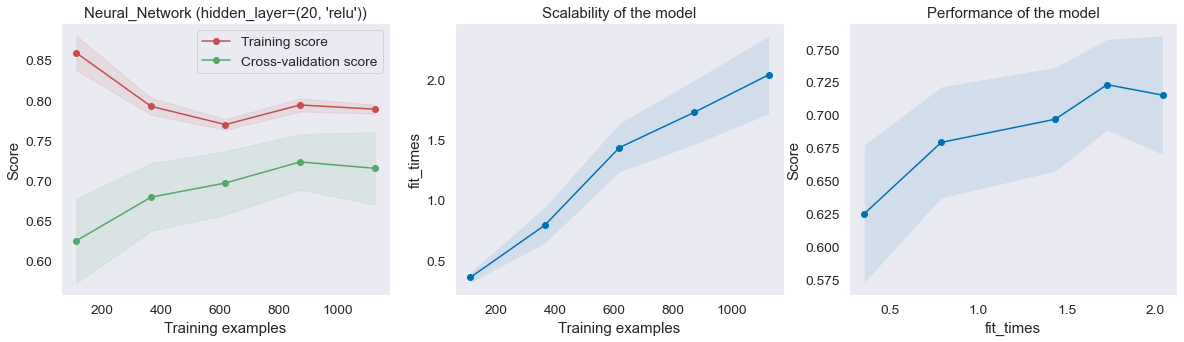

<Figure size 432x288 with 0 Axes>

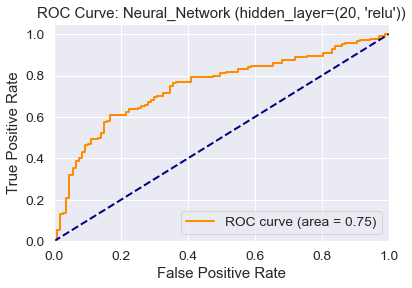

--------------------------------------------------
hidden_layer_sizes =  25 , activation =  relu
Accuracy:  0.6852589641434262
ROC AUC score:  0.7004802699896159
F1 Score:  0.6852589641434262
Training Accuracy:  0.7594810379241517
Testing Accuracy:  0.6852589641434262
Confusion Matrix
[[86 21]
 [58 86]]
Classification Report
              precision    recall  f1-score   support

           0       0.60      0.80      0.69       107
           1       0.80      0.60      0.69       144

    accuracy                           0.69       251
   macro avg       0.70      0.70      0.69       251
weighted avg       0.72      0.69      0.69       251

Cross Validation Score
[0.76134073 0.7734375  0.78609221 0.85202253 0.80363543 0.76216078
 0.75038402 0.82360471 0.77777778 0.77828981]


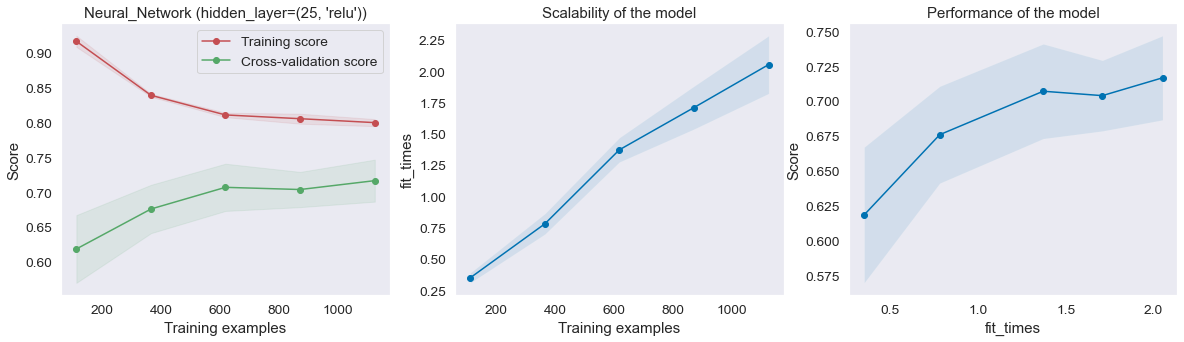

<Figure size 432x288 with 0 Axes>

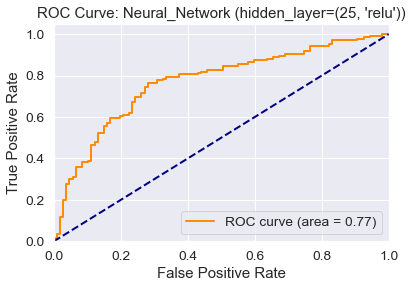

--------------------------------------------------
hidden_layer_sizes =  (5, 5) , activation =  relu
Accuracy:  0.6932270916334662
ROC AUC score:  0.7074247144340602
F1 Score:  0.6956521739130435
Training Accuracy:  0.7285429141716567
Testing Accuracy:  0.6932270916334662
Confusion Matrix
[[86 21]
 [56 88]]
Classification Report
              precision    recall  f1-score   support

           0       0.61      0.80      0.69       107
           1       0.81      0.61      0.70       144

    accuracy                           0.69       251
   macro avg       0.71      0.71      0.69       251
weighted avg       0.72      0.69      0.69       251

Cross Validation Score
[0.74697581 0.77835181 0.7675737  0.83934972 0.8187404  0.70340502
 0.73822325 0.79185868 0.75243216 0.80747568]


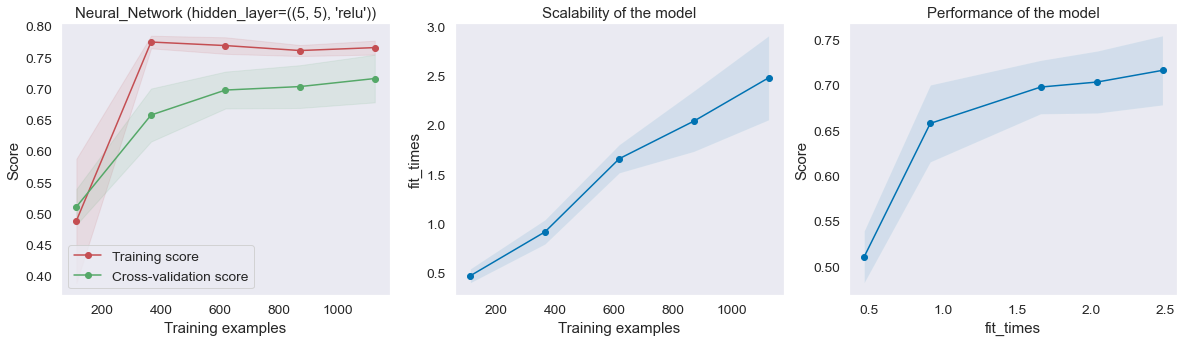

<Figure size 432x288 with 0 Axes>

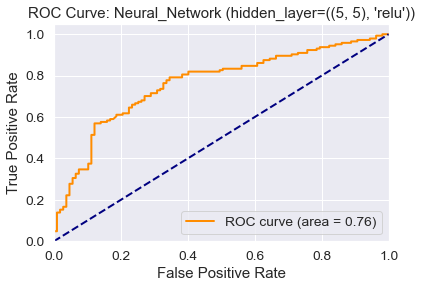

--------------------------------------------------
hidden_layer_sizes =  (10, 10) , activation =  relu
Accuracy:  0.7051792828685259
ROC AUC score:  0.7178413811007269
F1 Score:  0.7109374999999999
Training Accuracy:  0.7465069860279441
Testing Accuracy:  0.7051792828685259
Confusion Matrix
[[86 21]
 [53 91]]
Classification Report
              precision    recall  f1-score   support

           0       0.62      0.80      0.70       107
           1       0.81      0.63      0.71       144

    accuracy                           0.71       251
   macro avg       0.72      0.72      0.71       251
weighted avg       0.73      0.71      0.71       251

Cross Validation Score
[0.73487903 0.73815524 0.73343411 0.77956989 0.81233999 0.66077829
 0.69150026 0.77598566 0.69969278 0.71812596]


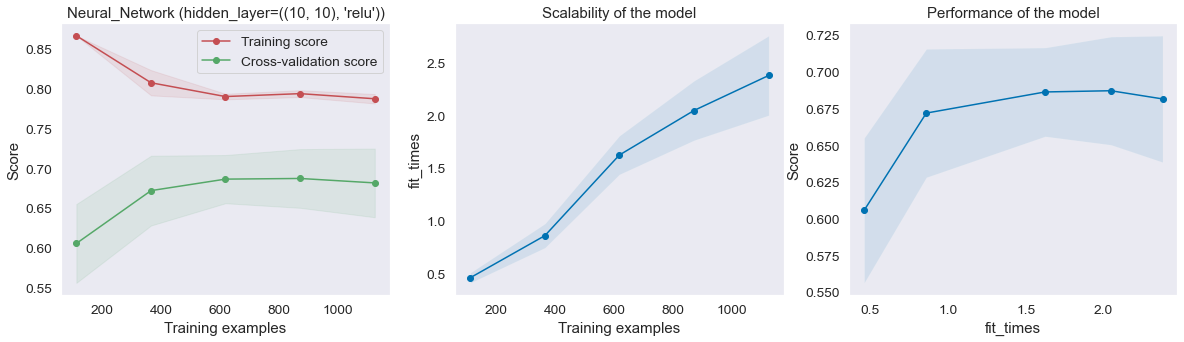

<Figure size 432x288 with 0 Axes>

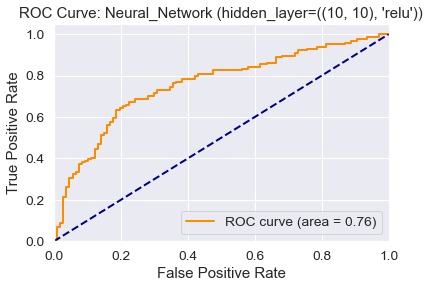

--------------------------------------------------
hidden_layer_sizes =  (10, 15) , activation =  relu
Accuracy:  0.6733067729083665
ROC AUC score:  0.6804582035306335
F1 Score:  0.6893939393939393
Training Accuracy:  0.7504990019960079
Testing Accuracy:  0.6733067729083665
Confusion Matrix
[[78 29]
 [53 91]]
Classification Report
              precision    recall  f1-score   support

           0       0.60      0.73      0.66       107
           1       0.76      0.63      0.69       144

    accuracy                           0.67       251
   macro avg       0.68      0.68      0.67       251
weighted avg       0.69      0.67      0.67       251

Cross Validation Score
[0.74873992 0.80040323 0.81254724 0.78545827 0.85227855 0.70122888
 0.79006656 0.78110599 0.73553507 0.77419355]


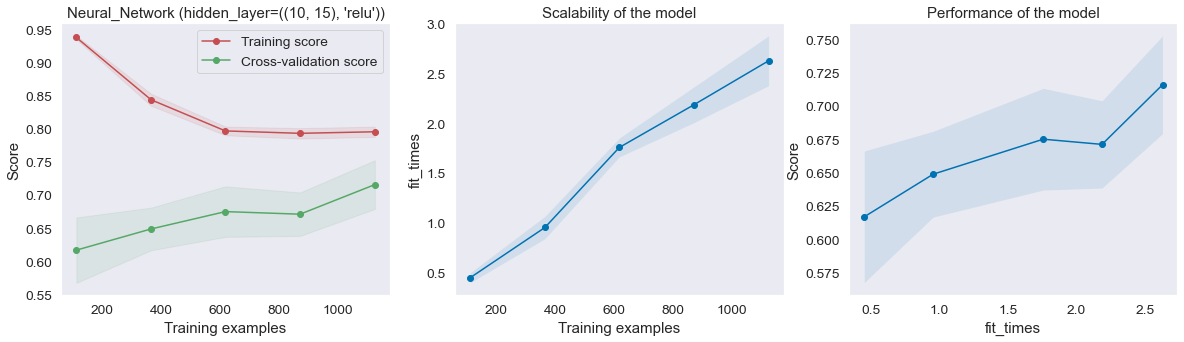

<Figure size 432x288 with 0 Axes>

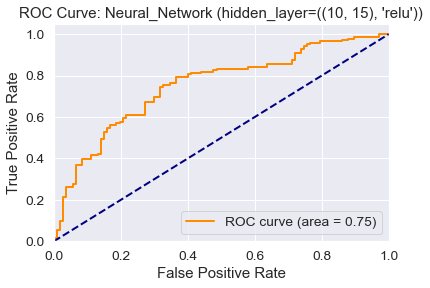

--------------------------------------------------
hidden_layer_sizes =  (5, 5, 5) , activation =  relu
Accuracy:  0.7250996015936255
ROC AUC score:  0.7316004672897196
F1 Score:  0.7415730337078651
Training Accuracy:  0.7295409181636726
Testing Accuracy:  0.7250996015936255
Confusion Matrix
[[83 24]
 [45 99]]
Classification Report
              precision    recall  f1-score   support

           0       0.65      0.78      0.71       107
           1       0.80      0.69      0.74       144

    accuracy                           0.73       251
   macro avg       0.73      0.73      0.72       251
weighted avg       0.74      0.73      0.73       251

Cross Validation Score
[0.71181956 0.74621976 0.76165281 0.80389145 0.74884793 0.7532002
 0.74833589 0.79864311 0.73220686 0.75268817]


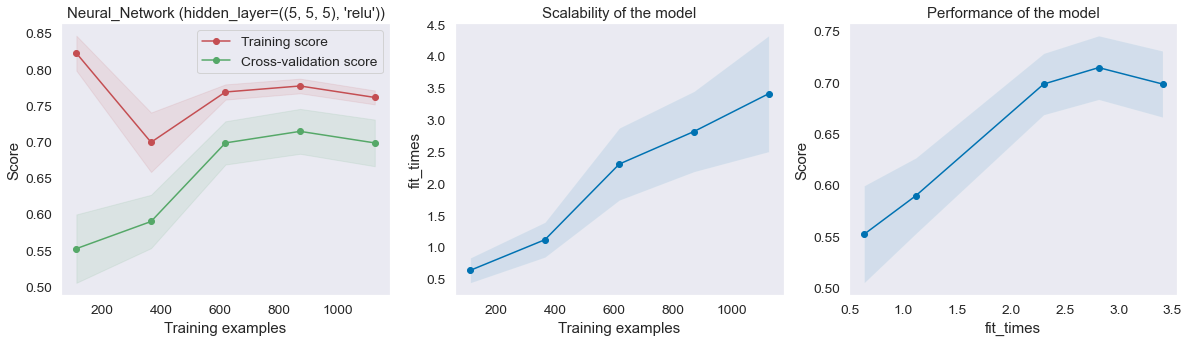

<Figure size 432x288 with 0 Axes>

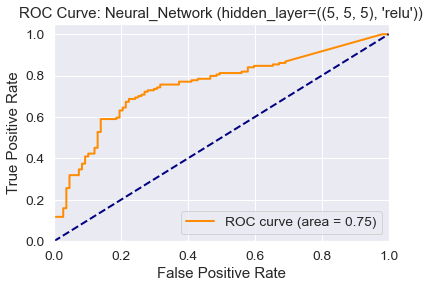

--------------------------------------------------
hidden_layer_sizes =  (5, 10, 5) , activation =  relu
Accuracy:  0.7211155378486056
ROC AUC score:  0.726927570093458
F1 Score:  0.7388059701492536
Training Accuracy:  0.7445109780439122
Testing Accuracy:  0.7211155378486056
Confusion Matrix
[[82 25]
 [45 99]]
Classification Report
              precision    recall  f1-score   support

           0       0.65      0.77      0.70       107
           1       0.80      0.69      0.74       144

    accuracy                           0.72       251
   macro avg       0.72      0.73      0.72       251
weighted avg       0.73      0.72      0.72       251

Cross Validation Score
[0.75604839 0.79359879 0.76669186 0.83307732 0.8031234  0.74321557
 0.7452637  0.78366615 0.7235023  0.73527906]


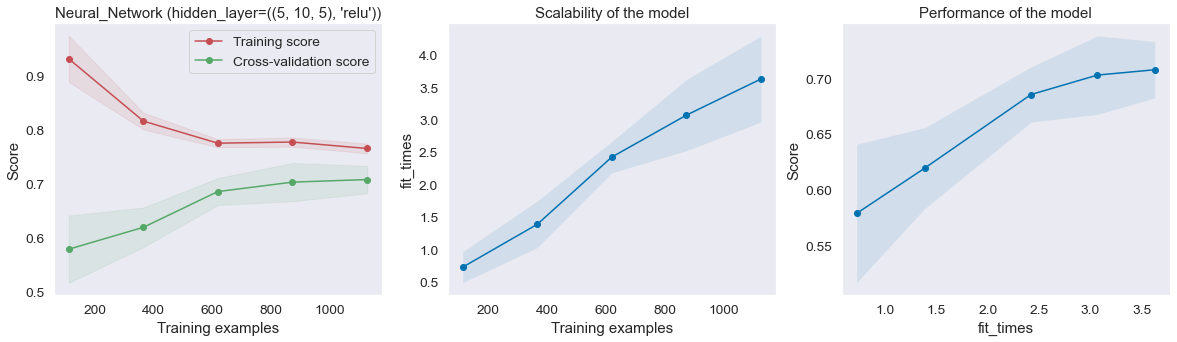

<Figure size 432x288 with 0 Axes>

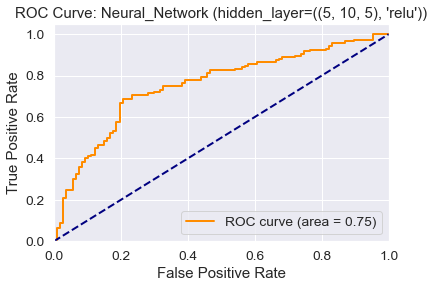

--------------------------------------------------
hidden_layer_sizes =  (10, 10, 10) , activation =  relu


In [ ]:
%%time
task = "Neural_Network"
# Multi-layer Perceptron Classifier
from sklearn.neural_network import MLPClassifier

f1 = []
train_acc = []
test_acc = []
params = [
    ((5), 'relu'),
    ((10), 'relu'),
    ((15), 'relu'),
    ((20), 'relu'),
    ((25), 'relu'),
    ((5, 5), 'relu'),
    ((10, 10), 'relu'),
    ((10, 15), 'relu'),
    ((5, 5, 5), 'relu'),
    ((5, 10, 5), 'relu'),
    ((10, 10, 10), 'relu'),
    ((5, 10, 5), 'tanh'),
    ((10, 10, 10), 'tanh'),
]
for k in params:
    print("hidden_layer_sizes = ", k[0], ", activation = ", k[1])
    clf = MLPClassifier(hidden_layer_sizes=k[0], max_iter=300,activation = k[1],solver='adam',random_state=1)
    fit_tree = clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    result[task][k] = {
        "accuracy_score" : accuracy_score(y_test,y_pred),
        "roc_auc": roc_auc_score(y_test, y_pred),
        "f1" : f1_score(y_test,y_pred, average='binary'),
        "training_acc": clf.score(x_train, y_train),
        "testing_acc": clf.score(x_test, y_test),
        "confusion_mat": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test,y_pred),
        "cross_validation_score": cross_val_score(clf, x, y, cv=10, scoring='roc_auc'),
    }
    print("Accuracy: ", result[task][k]["accuracy_score"])
    print("ROC AUC score: ", result[task][k]["roc_auc"])
    print("F1 Score: ", result[task][k]["f1"])
    print("Training Accuracy: ", result[task][k]["training_acc"])
    print("Testing Accuracy: ", result[task][k]["testing_acc"])
    print("Confusion Matrix")
    print(result[task][k]["confusion_mat"])
    print("Classification Report")
    print(result[task][k]["classification_report"])
    print("Cross Validation Score")
    print(result[task][k]["cross_validation_score"])
    
    # Add to lists
    f1.append(result[task][k]["f1"])
    train_acc.append(result[task][k]["training_acc"])
    test_acc.append(result[task][k]["testing_acc"])
    
    # Learning Curve
    plot_learning_curve(clf, f"{task} (hidden_layer={k})", x, y, axes=None, cv=10, n_jobs=4)
    plt.show()
    plt.savefig(f'mental_plots/learning_curve_{task}_{k}.png')
    
    # ROC_AUC Plot
    plot_roc_auc_curve(clf, x_test,y_test, y_pred, f"ROC Curve: {task} (hidden_layer={k})")
    plt.savefig(f'mental_plots/roc_curve_{task}_{k}.png')
    plt.show()
    
    print("--------------------------------------------------")
    
# Validation Curve
chosen_size = (10, 10, 10)
chosen_activation = 'tanh'
max_iter_list = [15, 30, 60, 90, 150, 240, 300, 400, 600, 1000]
plot_validation_curve(MLPClassifier(hidden_layer_sizes=k[0], max_iter=300,activation = chosen_activation,solver='adam',random_state=1), 
                      f"{task}: hidden_layer_sizes={chosen_size}, max_iter", x, y, "max_iter", max_iter_list, scoring="accuracy", axes=None, cv=10, n_jobs=4)
plt.savefig(f'mental_plots/validation_curve_{task}.png')
plt.show()

# 3 Boosting

with much more aggressive about pruning

Classifier =  AdaBoost
Accuracy:  0.6733067729083665
ROC AUC score:  0.6852609034267911
F1 Score:  0.6796875
Training Accuracy:  0.7315369261477046
Testing Accuracy:  0.6733067729083665
Confusion Matrix
[[82 25]
 [57 87]]
Classification Report
              precision    recall  f1-score   support

           0       0.59      0.77      0.67       107
           1       0.78      0.60      0.68       144

    accuracy                           0.67       251
   macro avg       0.68      0.69      0.67       251
weighted avg       0.70      0.67      0.67       251

Cross Validation Score
[0.78553427 0.78200605 0.78584026 0.8609831  0.79262673 0.74654378
 0.74014337 0.77931388 0.73553507 0.73502304]


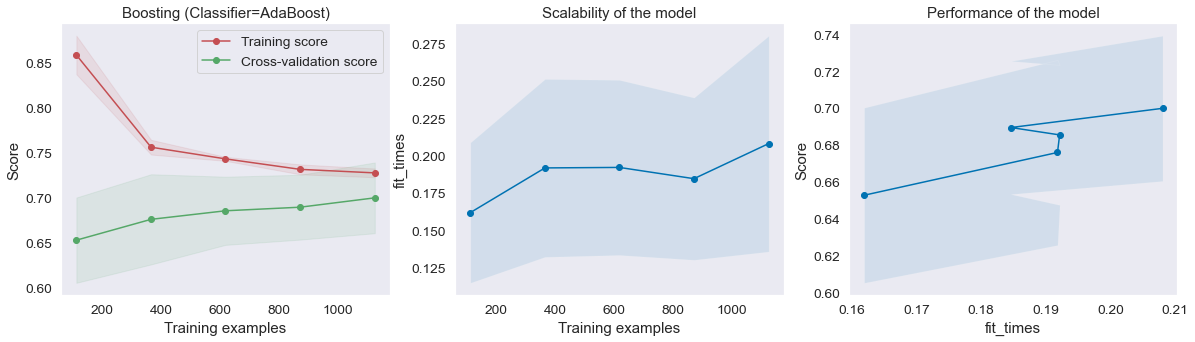

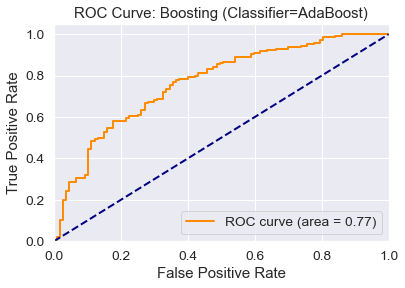

--------------------------------------------------
Classifier =  HistGradientBoosting
Accuracy:  0.701195219123506
ROC AUC score:  0.7059644340602285
F1 Score:  0.721189591078067
Training Accuracy:  1.0
Testing Accuracy:  0.701195219123506
Confusion Matrix
[[79 28]
 [47 97]]
Classification Report
              precision    recall  f1-score   support

           0       0.63      0.74      0.68       107
           1       0.78      0.67      0.72       144

    accuracy                           0.70       251
   macro avg       0.70      0.71      0.70       251
weighted avg       0.71      0.70      0.70       251

Cross Validation Score
[0.75982863 0.72076613 0.76014109 0.80261137 0.8015873  0.74654378
 0.71582181 0.79569892 0.78955453 0.81208397]


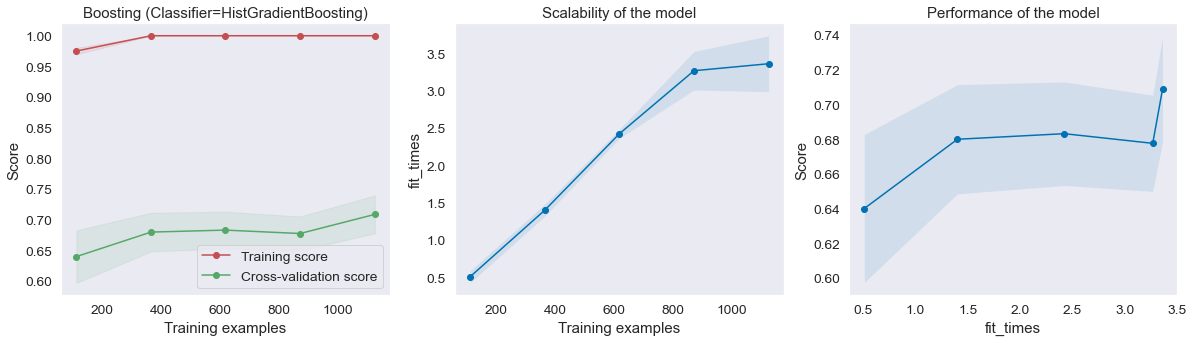

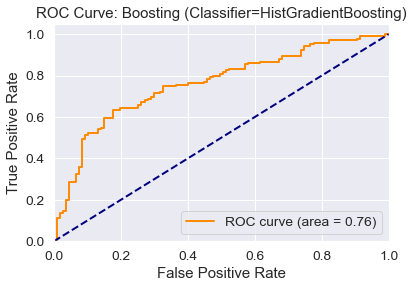

--------------------------------------------------
Classifier =  GradientBoosting
Accuracy:  0.6653386454183267
ROC AUC score:  0.6819184839044652
F1 Score:  0.661290322580645
Training Accuracy:  0.7654690618762475
Testing Accuracy:  0.6653386454183267
Confusion Matrix
[[85 22]
 [62 82]]
Classification Report
              precision    recall  f1-score   support

           0       0.58      0.79      0.67       107
           1       0.79      0.57      0.66       144

    accuracy                           0.67       251
   macro avg       0.68      0.68      0.67       251
weighted avg       0.70      0.67      0.66       251

Cross Validation Score
[0.77570565 0.76108871 0.79843789 0.85867896 0.80389145 0.7734255
 0.77624168 0.82411674 0.76804916 0.75524834]


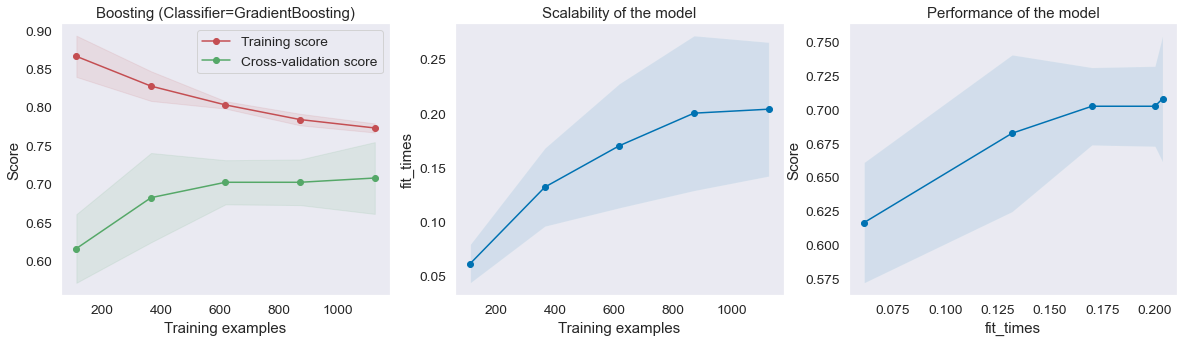

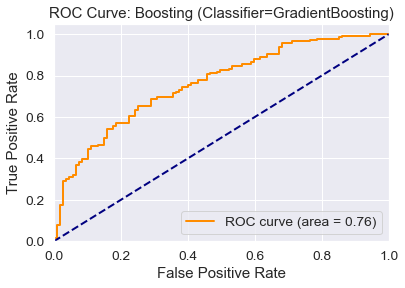

--------------------------------------------------


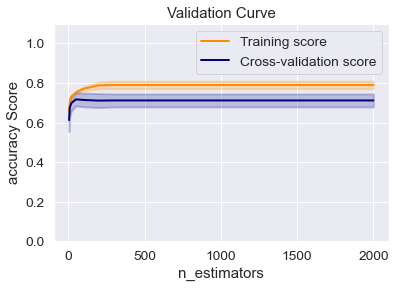

CPU times: user 1min 31s, sys: 15.8 s, total: 1min 47s
Wall time: 1min 21s


In [49]:
%%time
task = "Boosting"
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (AdaBoostClassifier,
                              GradientBoostingClassifier,
                              HistGradientBoostingClassifier)

base_estim = DecisionTreeClassifier(max_depth=1, max_features=0.06)

f1 = []
train_acc = []
test_acc = []
params = ["AdaBoost", "GradientBoosting", "HistGradientBoosting"]

for k, clf in [
    ("AdaBoost", AdaBoostClassifier(base_estimator=base_estim,
                        # n_estimators=100,
                        learning_rate=0.5,
                        random_state=42)),
    ("HistGradientBoosting", HistGradientBoostingClassifier(max_iter=300,
                                      validation_fraction=0.1,
                                      n_iter_no_change=15,
                                      verbose=0,
                                      random_state=42)),
    ("GradientBoosting", GradientBoostingClassifier( # n_estimators=100,
                                 subsample=0.67,
                                 max_features=0.06,
                                 validation_fraction=0.1,
                                 n_iter_no_change=15,
                                 verbose=0,
                                 random_state=42)),
]:
    print("Classifier = ", k)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    result[task][k] = {
        "accuracy_score" : accuracy_score(y_test,y_pred),
        "roc_auc": roc_auc_score(y_test, y_pred),
        "f1" : f1_score(y_test,y_pred, average='binary'),
        "training_acc": clf.score(x_train, y_train),
        "testing_acc": clf.score(x_test, y_test),
        "confusion_mat": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test,y_pred),
        "cross_validation_score": cross_val_score(clf, x, y, cv=10, scoring='roc_auc'),
    }
    print("Accuracy: ", result[task][k]["accuracy_score"])
    print("ROC AUC score: ", result[task][k]["roc_auc"])
    print("F1 Score: ", result[task][k]["f1"])
    print("Training Accuracy: ", result[task][k]["training_acc"])
    print("Testing Accuracy: ", result[task][k]["testing_acc"])
    print("Confusion Matrix")
    print(result[task][k]["confusion_mat"])
    print("Classification Report")
    print(result[task][k]["classification_report"])
    print("Cross Validation Score")
    print(result[task][k]["cross_validation_score"])
    
    # Add to lists
    f1.append(result[task][k]["f1"])
    train_acc.append(result[task][k]["training_acc"])
    test_acc.append(result[task][k]["testing_acc"])

    # Learning Curve
    plot_learning_curve(clf, f"{task} (Classifier={k})", x, y, axes=None, cv=10, n_jobs=4)
    plt.savefig(f'mental_plots/learning_curve_{task}_{k}.png')
    plt.show()
    
    
    # ROC_AUC Plot
    plot_roc_auc_curve(clf, x_test,y_test, y_pred, f"ROC Curve: {task} (Classifier={k})")
    plt.savefig(f'mental_plots/roc_curve_{task}_{k}.png')
    plt.show()
    print("--------------------------------------------------")

    
# Validation Curve
n_estimator_list = [5, 10 , 20, 50, 100, 200, 300, 500, 1000, 1500, 2000]
plot_validation_curve(GradientBoostingClassifier(
                                 subsample=0.67,
                                 max_features=0.06,
                                 validation_fraction=0.1,
                                 n_iter_no_change=15,
                                 verbose=0,
                                 random_state=42), f"{task}: GradientBoosting - n_estimators", x, y, "n_estimators", n_estimator_list, scoring="accuracy", axes=None, cv=10, n_jobs=4)
plt.savefig(f'mental_plots/validation_curve_{task}.png')
plt.show()

# 4 Support Vector Machines

with at least two kernel functions

kernel =  linear
Accuracy:  0.7131474103585658
ROC AUC score:  0.7259865005192108
F1 Score:  0.7187499999999999
Training Accuracy:  0.717564870259481
Testing Accuracy:  0.7131474103585658
Confusion Matrix
[[87 20]
 [52 92]]
Classification Report
              precision    recall  f1-score   support

           0       0.63      0.81      0.71       107
           1       0.82      0.64      0.72       144

    accuracy                           0.71       251
   macro avg       0.72      0.73      0.71       251
weighted avg       0.74      0.71      0.71       251

Cross Validation Score
[0.74697581 0.7515121  0.80045351 0.78981055 0.80209933 0.76241679
 0.72785458 0.76190476 0.70046083 0.71530978]


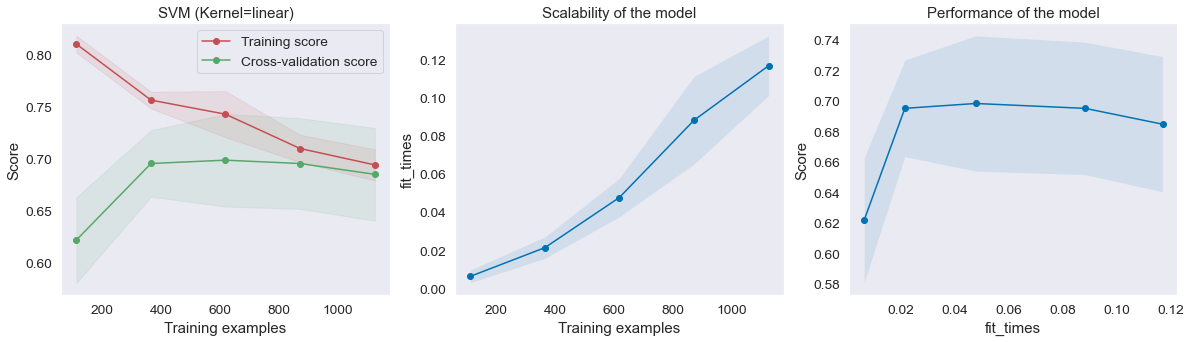

AttributeError: predict_proba is not available when  probability=False

In [50]:
%%time
task = "SVM"
from sklearn import svm

for k in ['linear', 'poly', 'rbf', 'sigmoid']:
    print("kernel = ", k)
    clf = svm.SVC(decision_function_shape='ovo', kernel=k)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    result[task][k] = {
        "accuracy_score" : accuracy_score(y_test,y_pred),
        "roc_auc": roc_auc_score(y_test, y_pred),
        "f1" : f1_score(y_test,y_pred, average='binary'),
        "training_acc": clf.score(x_train, y_train),
        "testing_acc": clf.score(x_test, y_test),
        "confusion_mat": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test,y_pred),
        "cross_validation_score": cross_val_score(clf, x, y, cv=10, scoring='roc_auc'),
    }
    print("Accuracy: ", result[task][k]["accuracy_score"])
    print("ROC AUC score: ", result[task][k]["roc_auc"])
    print("F1 Score: ", result[task][k]["f1"])
    print("Training Accuracy: ", result[task][k]["training_acc"])
    print("Testing Accuracy: ", result[task][k]["testing_acc"])
    print("Confusion Matrix")
    print(result[task][k]["confusion_mat"])
    print("Classification Report")
    print(result[task][k]["classification_report"])
    print("Cross Validation Score")
    print(result[task][k]["cross_validation_score"])
    
    # Add to lists
    f1.append(result[task][k]["f1"])
    train_acc.append(result[task][k]["training_acc"])
    test_acc.append(result[task][k]["testing_acc"])

    # Learning Curve
    plot_learning_curve(clf, f"{task} (Kernel={k})", x, y, axes=None, cv=10, n_jobs=4)
    plt.savefig(f'mental_plots/learning_curve_{task}_{k}.png')
    plt.show()
    
    
    # ROC_AUC Plot
    plot_roc_auc_curve(clf, x_test,y_test, y_pred, f"ROC Curve: {task} (Kernel={k})")
    plt.savefig(f'mental_plots/roc_curve_{task}_{k}.png')
    plt.show()
    print("--------------------------------------------------")

## Grid Search

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   11.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Parameters:
 {'C': 10, 'gamma': 0.01}
Best Estimators:
 SVC(C=10, gamma=0.01)
Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   13.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   14.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   13.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   13.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   13.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   13.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   14.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   14.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   13.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   13.8s finished


Accuracy:  0.7250996015936255
ROC AUC score:  0.7340018172377986
F1 Score:  0.7376425855513309
Training Accuracy:  0.7764471057884231
Testing Accuracy:  0.7250996015936255
Confusion Matrix
[[85 22]
 [47 97]]
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.79      0.71       107
           1       0.82      0.67      0.74       144

    accuracy                           0.73       251
   macro avg       0.73      0.73      0.72       251
weighted avg       0.74      0.73      0.73       251

Cross Validation Score
[0.75428427 0.80090726 0.79314689 0.83717358 0.81157194 0.75499232
 0.7703533  0.8218126  0.73451101 0.80107527]
Best Params :  {'C': 10, 'gamma': 0.01}


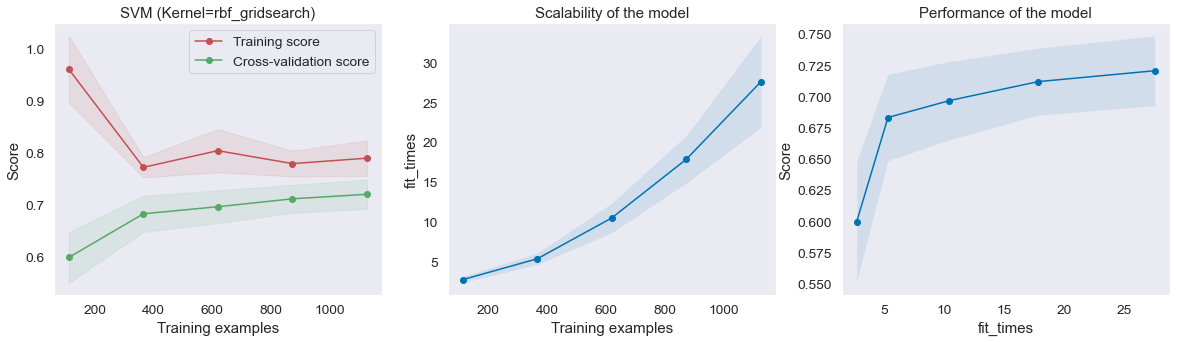

AttributeError: predict_proba is not available when  probability=False

In [51]:
%%time
from sklearn.model_selection import GridSearchCV
# Grid Search
task = "SVM"
k = "rbf_gridsearch"
# Parameter Grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]}

# Make grid search classifier
clf_grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, verbose=1, cv=10)

# Train the classifier
clf_grid.fit(x_train, y_train)

y_pred = clf_grid.predict(x_test)
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

result[task][k] = {
        "accuracy_score" : accuracy_score(y_test,y_pred),
        "roc_auc": roc_auc_score(y_test, y_pred),
        "f1" : f1_score(y_test,y_pred, average='binary'),
        "training_acc": clf_grid.score(x_train, y_train),
        "testing_acc": clf_grid.score(x_test, y_test),
        "confusion_mat": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test,y_pred),
        "cross_validation_score": cross_val_score(clf_grid, x, y, cv=10, scoring='roc_auc'),
        "best_parameters": clf_grid.best_params_,
        "best_estimators": clf_grid.best_estimator_
    }
print("Accuracy: ", result[task][k]["accuracy_score"])
print("ROC AUC score: ", result[task][k]["roc_auc"])
print("F1 Score: ", result[task][k]["f1"])
print("Training Accuracy: ", result[task][k]["training_acc"])
print("Testing Accuracy: ", result[task][k]["testing_acc"])
print("Confusion Matrix")
print(result[task][k]["confusion_mat"])
print("Classification Report")
print(result[task][k]["classification_report"])
print("Cross Validation Score")
print(result[task][k]["cross_validation_score"])
print("Best Params : ", result[task][k]["best_parameters"])
    
# Add to lists
f1.append(result[task][k]["f1"])
train_acc.append(result[task][k]["training_acc"])
test_acc.append(result[task][k]["testing_acc"])

# Learning Curve
plot_learning_curve(clf_grid, f"{task} (Kernel={k})", x, y, axes=None, cv=10, n_jobs=4)
plt.savefig(f'mental_plots/learning_curve_{task}_{k}.png')
plt.show()

# ROC_AUC Plot
plot_roc_auc_curve(clf_grid, x_test,y_test, y_pred, f"ROC Curve: {task} (Kernel={k})")
plt.savefig(f'mental_plots/roc_curve_{task}_{k}.png')
plt.show()

# Validation Curve
param_range = np.logspace(-6, 2, 8)
plot_validation_curve(svm.SVC(kernel='rbf'), 
                      f"{task}: RBF - gamma, max_iter", x, y, "gamma", param_range, scoring="accuracy", axes=None, cv=10, n_jobs=4)
plt.savefig(f'mental_plots/validation_curve_{task}.png')
plt.show()

# 5 K-Nearest Neighbors

with different values of k

K =  1
Accuracy:  0.5976095617529881
ROC AUC score:  0.6072819314641744
F1 Score:  0.6070038910505836
Training Accuracy:  1.0
Testing Accuracy:  0.5976095617529881
Confusion Matrix
[[72 35]
 [66 78]]
Classification Report
              precision    recall  f1-score   support

           0       0.52      0.67      0.59       107
           1       0.69      0.54      0.61       144

    accuracy                           0.60       251
   macro avg       0.61      0.61      0.60       251
weighted avg       0.62      0.60      0.60       251

Cross Validation Score
[0.56426411 0.53225806 0.5952381  0.62429595 0.60061444 0.56835637
 0.6327445  0.59139785 0.60855095 0.67255504]


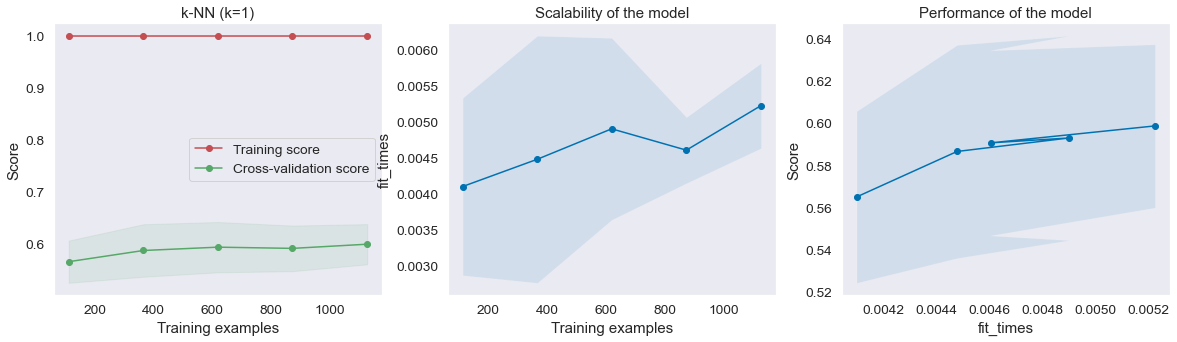

--------------------------------------------------
K =  3
Accuracy:  0.601593625498008
ROC AUC score:  0.614356178608515
F1 Score:  0.6031746031746033
Training Accuracy:  0.8003992015968064
Testing Accuracy:  0.601593625498008
Confusion Matrix
[[75 32]
 [68 76]]
Classification Report
              precision    recall  f1-score   support

           0       0.52      0.70      0.60       107
           1       0.70      0.53      0.60       144

    accuracy                           0.60       251
   macro avg       0.61      0.61      0.60       251
weighted avg       0.63      0.60      0.60       251

Cross Validation Score
[0.61895161 0.64629536 0.68304359 0.7109575  0.65962622 0.56208397
 0.65565796 0.70993344 0.66385049 0.71902202]


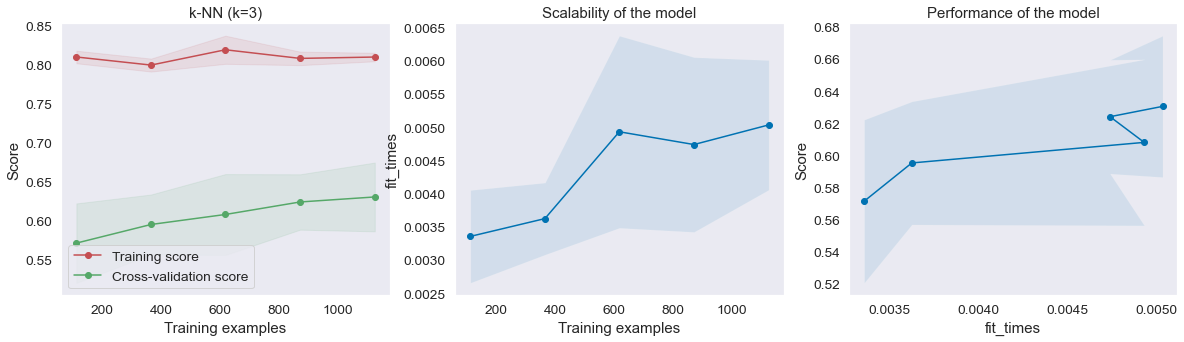

--------------------------------------------------
K =  5
Accuracy:  0.5976095617529881
ROC AUC score:  0.608482606438214
F1 Score:  0.6039215686274509
Training Accuracy:  0.7674650698602794
Testing Accuracy:  0.5976095617529881
Confusion Matrix
[[73 34]
 [67 77]]
Classification Report
              precision    recall  f1-score   support

           0       0.52      0.68      0.59       107
           1       0.69      0.53      0.60       144

    accuracy                           0.60       251
   macro avg       0.61      0.61      0.60       251
weighted avg       0.62      0.60      0.60       251

Cross Validation Score
[0.67704133 0.65183972 0.71227009 0.77892985 0.71582181 0.61699949
 0.68932412 0.70878136 0.64080901 0.72017409]


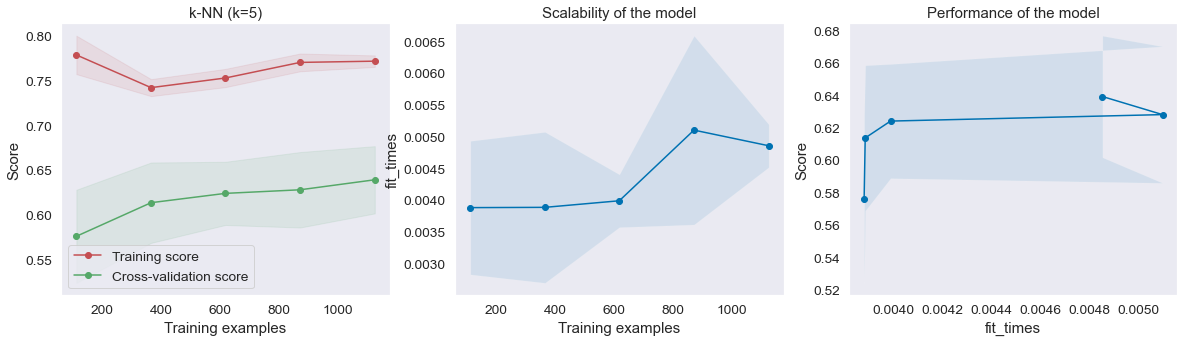

--------------------------------------------------
K =  7
Accuracy:  0.601593625498008
ROC AUC score:  0.6131555036344757
F1 Score:  0.6062992125984252
Training Accuracy:  0.7435129740518962
Testing Accuracy:  0.601593625498008
Confusion Matrix
[[74 33]
 [67 77]]
Classification Report
              precision    recall  f1-score   support

           0       0.52      0.69      0.60       107
           1       0.70      0.53      0.61       144

    accuracy                           0.60       251
   macro avg       0.61      0.61      0.60       251
weighted avg       0.63      0.60      0.60       251

Cross Validation Score
[0.7140877  0.6703629  0.6840514  0.78392217 0.72670251 0.64119304
 0.70737327 0.67460317 0.67063492 0.70122888]


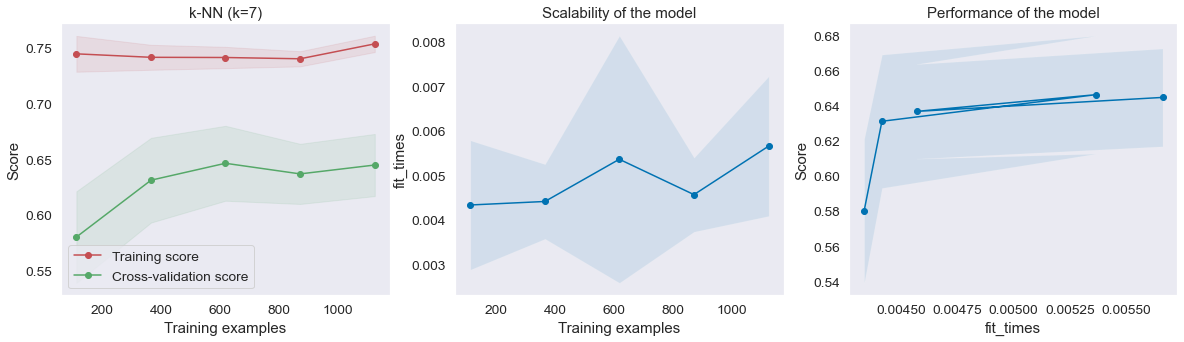

--------------------------------------------------
K =  9
Accuracy:  0.6294820717131474
ROC AUC score:  0.6458657840083074
F1 Score:  0.6234817813765182
Training Accuracy:  0.7385229540918163
Testing Accuracy:  0.6294820717131474
Confusion Matrix
[[81 26]
 [67 77]]
Classification Report
              precision    recall  f1-score   support

           0       0.55      0.76      0.64       107
           1       0.75      0.53      0.62       144

    accuracy                           0.63       251
   macro avg       0.65      0.65      0.63       251
weighted avg       0.66      0.63      0.63       251

Cross Validation Score
[0.71333165 0.68926411 0.66553288 0.77355351 0.72299027 0.64311316
 0.71390169 0.67421915 0.66436252 0.69265233]


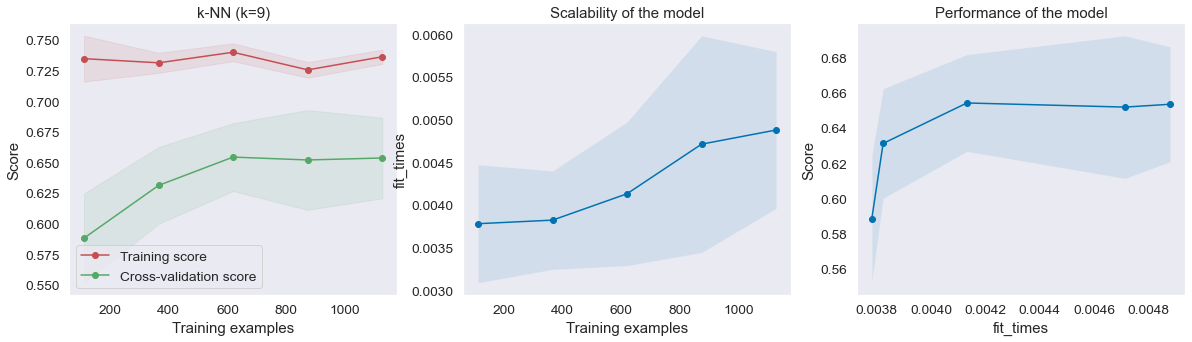

--------------------------------------------------


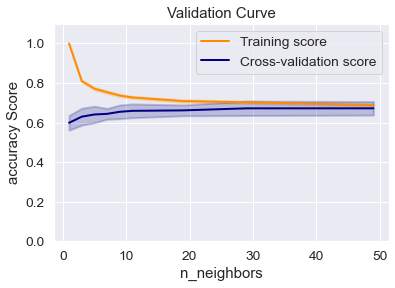

CPU times: user 5.23 s, sys: 213 ms, total: 5.45 s
Wall time: 13.9 s


In [52]:
%%time
task = "k-NN"

from sklearn.neighbors import KNeighborsClassifier

f1 = []
train_acc = []
test_acc = []
params = [1, 3, 5, 7, 9]

for k in params:
    print("K = ", k)
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    result[task][k] = {
        "accuracy_score" : accuracy_score(y_test,y_pred),
        "roc_auc": roc_auc_score(y_test, y_pred),
        "f1" : f1_score(y_test,y_pred, average='binary'),
        "training_acc": clf.score(x_train, y_train),
        "testing_acc": clf.score(x_test, y_test),
        "confusion_mat": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test,y_pred),
        "cross_validation_score": cross_val_score(clf, x, y, cv=10, scoring='roc_auc'),
    }
    print("Accuracy: ", result[task][k]["accuracy_score"])
    print("ROC AUC score: ", result[task][k]["roc_auc"])
    print("F1 Score: ", result[task][k]["f1"])
    print("Training Accuracy: ", result[task][k]["training_acc"])
    print("Testing Accuracy: ", result[task][k]["testing_acc"])
    print("Confusion Matrix")
    print(result[task][k]["confusion_mat"])
    print("Classification Report")
    print(result[task][k]["classification_report"])
    print("Cross Validation Score")
    print(result[task][k]["cross_validation_score"])

    # Add to lists
    f1.append(result[task][k]["f1"])
    train_acc.append(result[task][k]["training_acc"])
    test_acc.append(result[task][k]["testing_acc"])
    
    plot_learning_curve(clf, f"{task} (k={k})", x, y, axes=None, cv=10, n_jobs=4)
    plt.savefig(f'mental_plots/learning_curve_{task}_{k}.png')
    plt.show()
    print("--------------------------------------------------")
    
# Validation Curve
new_params = params + [11, 19, 29, 49]
plot_validation_curve(KNeighborsClassifier(), f"{task}: n_neighbors", x, y, "n_neighbors", new_params, scoring="accuracy", axes=None, cv=10, n_jobs=4)
plt.savefig(f'mental_plots/validation_curve_{task}.png')
plt.show()

--------------------------------------------------

In [53]:
result

{'Decision_Tree': {1: {'accuracy_score': 0.6812749003984063,
   'roc_auc': 0.6994093977154724,
   'f1': 0.6747967479674797,
   'training_acc': 0.6836327345309381,
   'testing_acc': 0.6812749003984063,
   'confusion_mat': array([[88, 19],
          [61, 83]]),
   'classification_report': '              precision    recall  f1-score   support\n\n           0       0.59      0.82      0.69       107\n           1       0.81      0.58      0.67       144\n\n    accuracy                           0.68       251\n   macro avg       0.70      0.70      0.68       251\nweighted avg       0.72      0.68      0.68       251\n',
   'cross_validation_score': array([0.64490927, 0.65297379, 0.77777778, 0.67293907, 0.72862263,
          0.69726062, 0.67306708, 0.67204301, 0.65668203, 0.66500256]),
   'tree_rules': '|--- family_history <= 0.50\n|   |--- class: 0\n|--- family_history >  0.50\n|   |--- class: 1\n'},
  2: {'accuracy_score': 0.7051792828685259,
   'roc_auc': 0.7010319314641744,
   'f1': 0

In [54]:
# Save Output
import json
json.dump(result.dump(open("mental_health_result.json", "w")))

AttributeError: 'dict' object has no attribute 'dump'